<a href="https://colab.research.google.com/github/sabiretutardemir/100-Day-ML-Codes-Challenge/blob/main/Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Credit Risk Prediction and Analysis**

This notebook is written for **Credit Risk Dataset**

[The link of the dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data)


Dataset link: https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data


**❇ Table of Contents:**

1.   Goal of this Notebook and Problem Statement
2.   Introduction of Dataset
3.   Importing Basic Libraries
4.   Loading Dataset
5.   Basic EDA Analysis and Preprocessing Data
6.   Dealing with Missing Values
7.   Dealing with Outliers
8.   Visualization
9.   Feature Engineering
10.  Applying Models
11.  Ensembling Model
12.  Hyperparameter Tuning and Model Evaluations
13. Final Discussion

# **1. Goal of this Notebook and Problem Statement**

**Problem Statement:**

The main business problem is to evaluate and mitigate the risk of loan defaults. When people default on their loans, companies loses that money. Creating Machine Learning pipeline to predict defaults accurately is vital for minimizing this risk and keep company's money safely.

Main goal is to predict the "loan_status" column by using machine learning models in the dataset.

**Importance and Benefit:**

Loan defaults has a serious impact on company's profitability. Solving this problem by leveraging machine learning algorithms helps the company by reducing losses from defaulted loans.
Furthermore, defaulted loans require costly recovery efforts, such as legal proceedings which may damage company' reputations.

Predicting default loans correctly enables the company avoid this undesirable, time consuming process and boost their profits by making data driven loan decisions.


# **2. Introduction of Dataset**

This dataset covers information about person applying for loans and various features that could impact credit risk.

**person_age**: The age of the individual.

**person_income**: The individual's annual income.

**person_home_ownership:** The home ownership status of the individual

**person_emp_length**: The number of years the individual has been employed.

**loan_intent:** The purpose for the loan

**loan_grade**: The credit grade assigned to the loan

**loan_amnt**: The total amount of the loan.

**loan_int_rate**: The interest rate applied to the loan.

**loan_status**: The status of the loan, default (1) or non-default (0).

**loan_percent_income**: The loan amount as a percentage of the individual's income.

**cb_person_default_on_file**: Whether the person has historically defaulted (Yes or No).

**cb_person_cred_hist_length**: The length of the person's credit history, in years.

# **3. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import warnings
warnings.filterwarnings('ignore')

#Libraries for Future Engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

#applying models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier



#Hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# **4. Loading Dataset**

In [ ]:
credit_risk_df = pd.read_csv('credit_risk_dataset.csv')

# **5. Basic EDA**

head, tail, shape, check duplicated rows, check missing values, info, etc.

In [ ]:
print("Head 5 Examples of the credit_risk_df: \n")
credit_risk_df.head()

Head 5 Examples of the credit_risk_df: 



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
print("Tail 5 Examples of the credit_risk_df: \n")
credit_risk_df.tail()

Tail 5 Examples of the credit_risk_df: 



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [ ]:
#Check data type for each columns
print("The data type of each columns of credit_risk_df is: \n")
credit_risk_df.info()

The data type of each columns of credit_risk_df is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)

In [ ]:
#The rows and columns number
print("The shape of the credit_risk_df: ", credit_risk_df.shape)

#Check duplicates
print("Duplicated rows number for credit_risk_df is: ", credit_risk_df.duplicated().sum())

The shape of the credit_risk_df:  (32581, 12)
Duplicated rows number for credit_risk_df is:  165


In [ ]:
#drop duplicated rows
credit_risk_df.drop_duplicates(inplace=True)

In [ ]:
#Check missing values
print("The missing values of credit_risk_df : \n ")
credit_risk_df.isnull().sum()

The missing values of credit_risk_df : 
 


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


# **6. Dealing with Missing Values**

In [ ]:
#Calculate the ratio of missing values
print(f"The percentage of person_emp_length missing values to all values: \
      {credit_risk_df['person_emp_length'].isna().sum() / credit_risk_df.shape[0]:.2%}")
print(f"The percentage of loan_int_rate missing values to all values: \
      {credit_risk_df['loan_int_rate'].isna().sum() / credit_risk_df.shape[0]:.2%}")

The percentage of person_emp_length missing values to all values:       2.74%
The percentage of loan_int_rate missing values to all values:       9.55%


**person_emp_length** has 2.47% percentage compared to all data. I will check the skewness of this feature and replace it with suitable values.

>if skewness greater then 1 (highly skewed), then fill na values with median value.

>if skewness less then 1(closer to a symmetric distribution), fill na values with mean value.


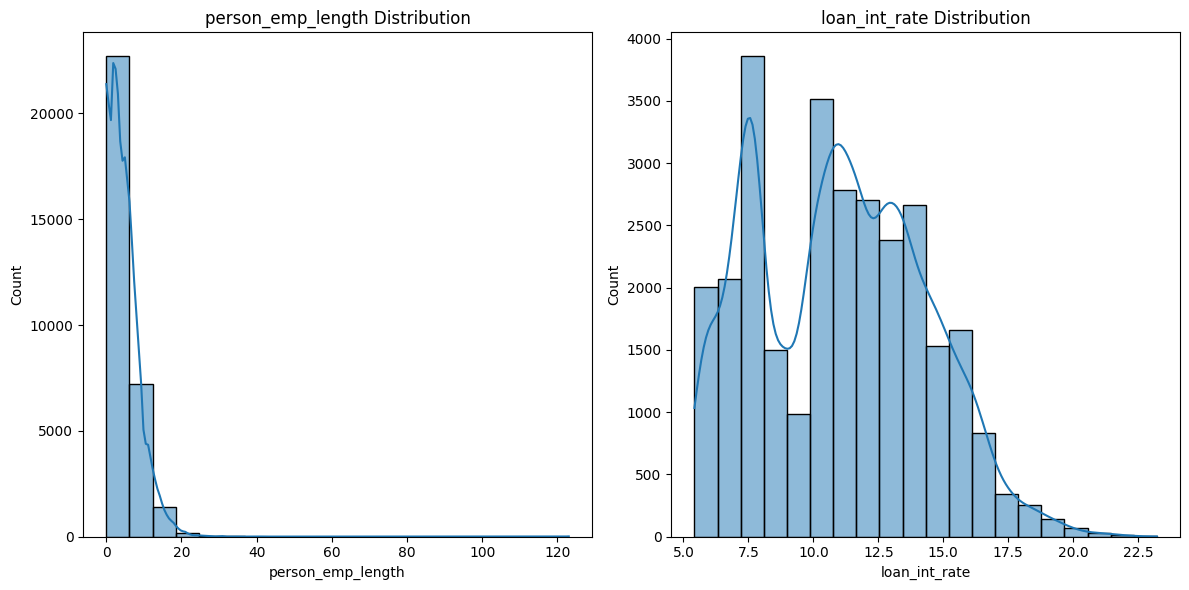

In [ ]:
#check distribution by putting data into histogram
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#first histogram
sns.histplot(credit_risk_df['person_emp_length'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('person_emp_length Distribution')

sns.histplot(credit_risk_df['loan_int_rate'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('loan_int_rate Distribution')

plt.tight_layout()
plt.show()


In [ ]:
print("The skew of the person_emp_length ",credit_risk_df['person_emp_length'].skew())
median_person_emp_length = credit_risk_df['person_emp_length'].median()
credit_risk_df['person_emp_length'].fillna(median_person_emp_length, inplace=True)

print("The skew of the loan_int_rate ",credit_risk_df['loan_int_rate'].skew())
mean_loan_int_rate = credit_risk_df['loan_int_rate'].mean()
credit_risk_df['loan_int_rate'].fillna(mean_loan_int_rate, inplace=True)

The skew of the person_emp_length  2.619915431174932
The skew of the loan_int_rate  0.2070016541005385


In [ ]:
#check na values again
credit_risk_df[['person_emp_length','loan_int_rate']].isnull().sum()

,0
person_emp_length,0
loan_int_rate,0


#**7. Dealing with Outliers**

In [ ]:
credit_risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.000000,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.000000,79218.00,6000000.00
person_emp_length,32416.0,4.768880,4.090411,0.00,2.00,4.000000,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.000000,12250.00,35000.00
loan_int_rate,32416.0,11.017265,3.083040,5.42,8.49,11.017265,13.11,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.000000,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.150000,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.000000,8.00,30.00


**Observation**
>person_age includes extreme values such as 144. indicating that bthe bank has a customers from diverse range of age. Most of them between 23-30 years old.

>person_income has a very wide range, indicating a significant number of high-income outliers. (6000000.00). The bank caters to people with both lower and higher income.

>person_emp_length most values falling between 2 and 7 years(%25-%75), but some outliers extend far beyond this range. (123). We can say that customers of the bank a mix of early-career and more established professionals.

>loan_amnt has a wide range of value.The bank provides small or large loans

>loan_int_rate: Interest rates vary from 5.42% to 23.22%. The lag between min and max is relatively high, showing bank offers a range of rates depending on the loan and borrower.


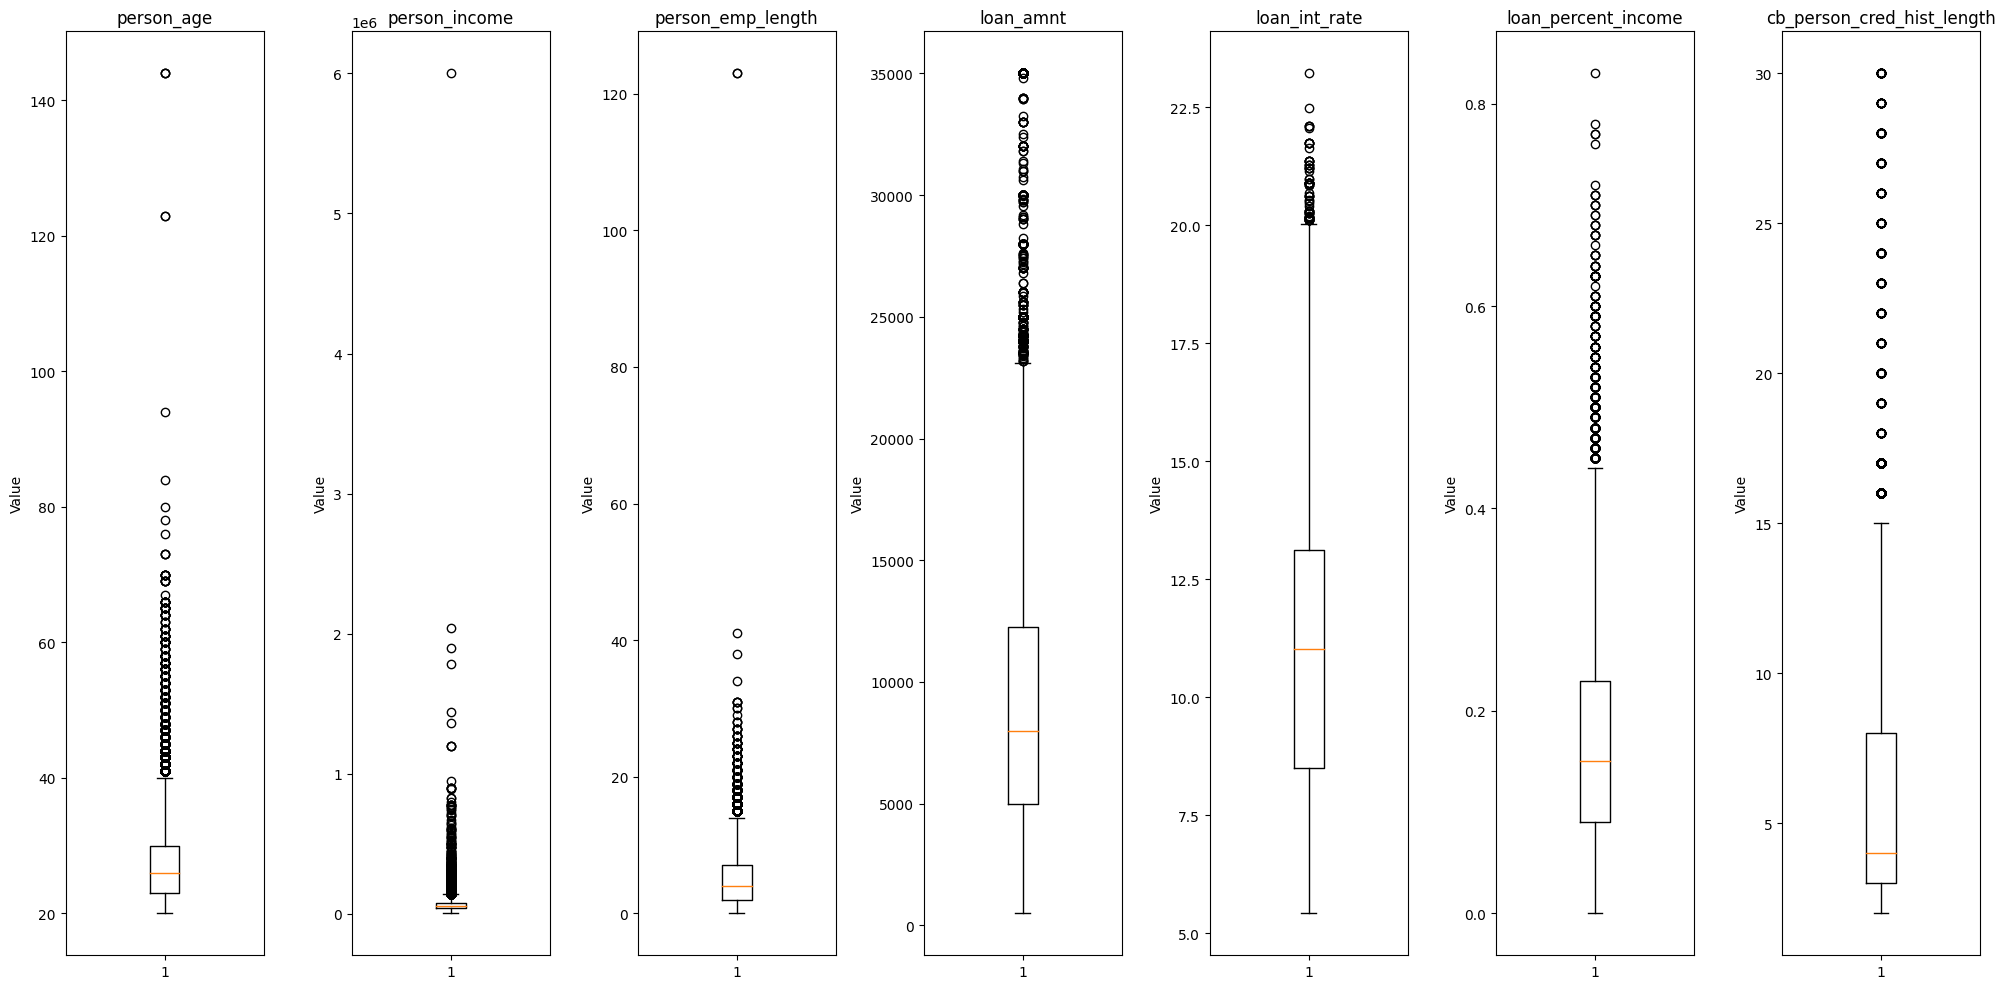

In [ ]:
#visualize numerical columns to identify outliers easily with boxplots
#create a dataframe representing numeric values
numeric_data = credit_risk_df[["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]]

plt.figure(figsize=(20, 10))

#Walk through each column in the numeric data and create a box plot for each of it
for i, column in enumerate(numeric_data.columns):
    plt.subplot(1, len(numeric_data.columns), i + 1)
    plt.boxplot(numeric_data[column])
    plt.title(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

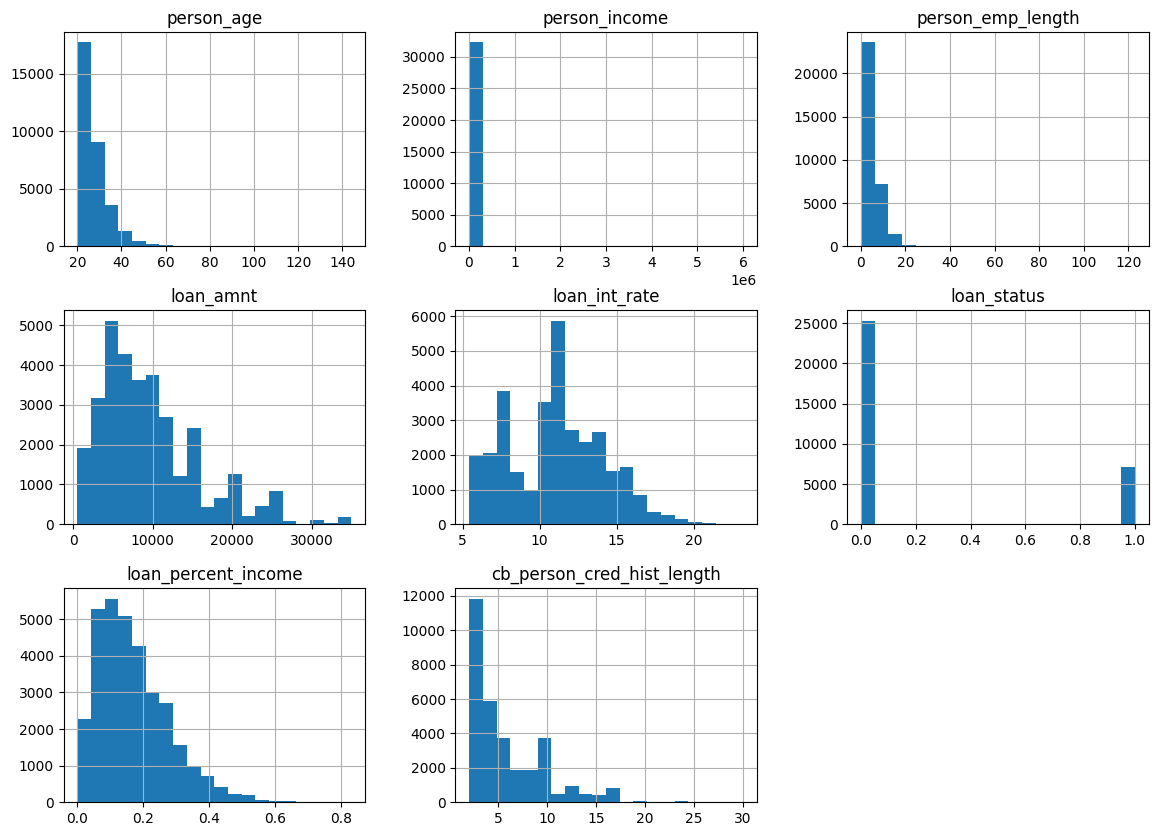

In [ ]:
#Histrogram of all features
credit_risk_df.hist(bins=20, figsize=(14, 10))
plt.show()

In [ ]:
#I decided to delete the age more than 80
print("The shape of credit_risk_df before cleaning; ", credit_risk_df.shape)
credit_risk_df = credit_risk_df[credit_risk_df['person_age'] <= 80]

The shape of credit_risk_df before cleaning;  (32416, 12)


In [ ]:
print("The shape of credit_risk_df after cleaning; ", credit_risk_df.shape)

The shape of credit_risk_df after cleaning;  (32409, 12)


In [ ]:
#for employment length, I will remove the rows more than 60 years. I defined 60 based on age column
print("The shape of credit_risk_df before cleaning; ", credit_risk_df.shape)
credit_risk_df = credit_risk_df[credit_risk_df['person_emp_length'] <= 60]

The shape of credit_risk_df before cleaning;  (32409, 12)


In [ ]:
print("The shape of credit_risk_df after cleaning; ", credit_risk_df.shape)

The shape of credit_risk_df after cleaning;  (32407, 12)


# **8. Visualizations**

In [ ]:
#Checking variablity of each column
credit_risk_df.nunique().sort_values()

,0
loan_status,2
cb_person_default_on_file,2
person_home_ownership,4
loan_intent,6
loan_grade,7
cb_person_cred_hist_length,29
person_emp_length,35
person_age,54
loan_percent_income,77
loan_int_rate,349


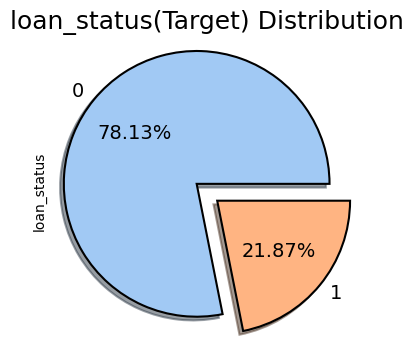

In [ ]:
#Check the distribition of loan_status which is target
plt.figure(figsize=(4, 4))
colors = sns.color_palette("pastel")
explode = [0.1 for _ in range(credit_risk_df['loan_status'].nunique())]

#Plotting
credit_risk_df.groupby('loan_status')['loan_status'].count().plot.pie(
    colors=colors,
    explode=explode,
    autopct="%.2f%%",
    shadow=True,  #Adding shadow
    startangle= 0,  #Start angle for better alignment
    textprops={'fontsize': 14},  #Adjust text size
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}  #adding edges color and width
)


plt.title('loan_status(Target) Distribution', fontsize=18)

#make sure that pie is shown as a circle.
plt.axis('equal')
plt.show()

>This pie chart shows that there is a inblance in the dataset. 78.13% percent of the data belong to status 0, which represent people paid their debt back to bank. Status 0 is more common than tha status 1. I want to check the distirbution of loan_status based on categorical and numeerical features. After that I will decide to conduct oversampling, undersampling or other methods to decrease this imblance or not. I have some concerns about oversampling. Since it is a dataset for bank related to loan payment, it is crucial to proceed with caution.

>Potential risk of oversampling is possibility of introducing bias into the data. This could end up with unfair lending practices.

>I probably use ensemble methods or I will assign different weights to samples from each loan status group during training.



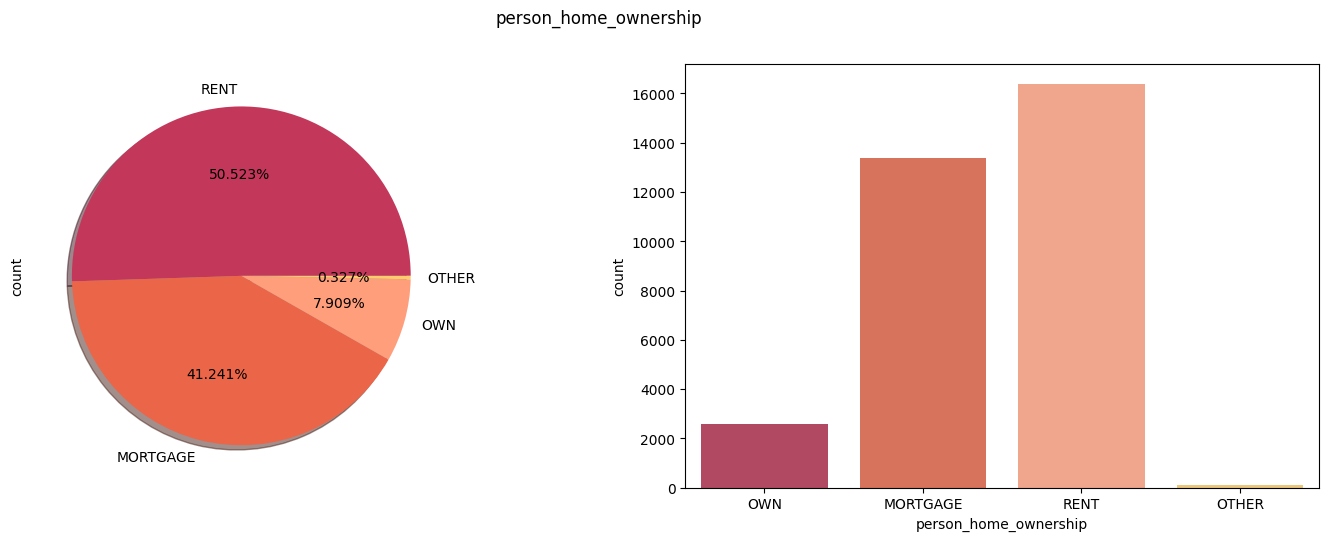

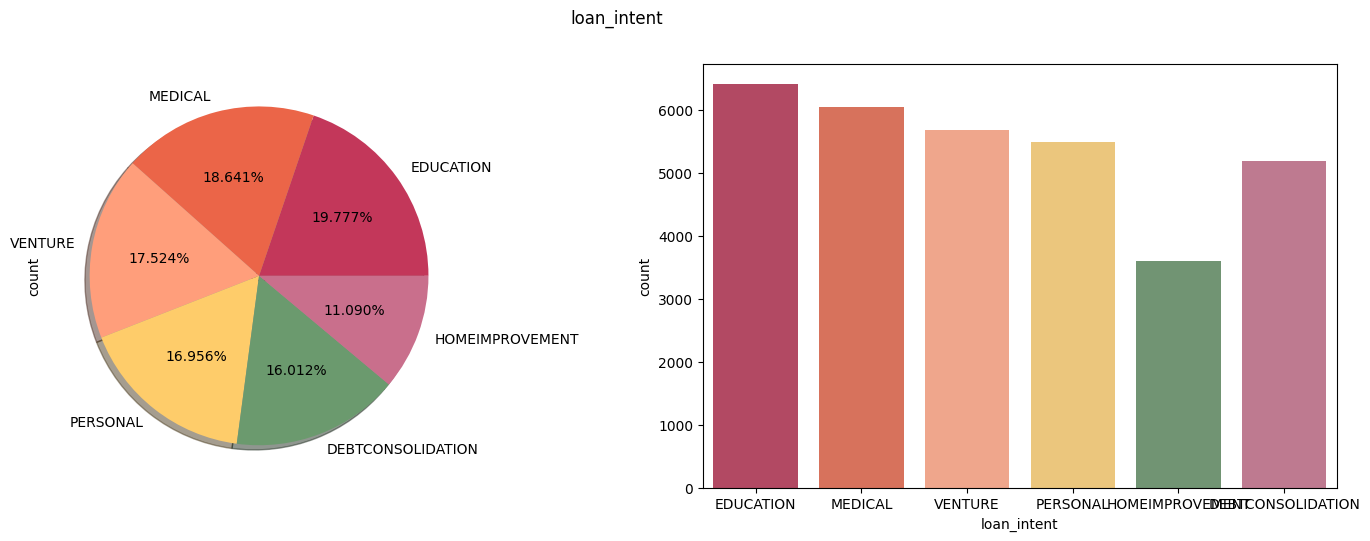

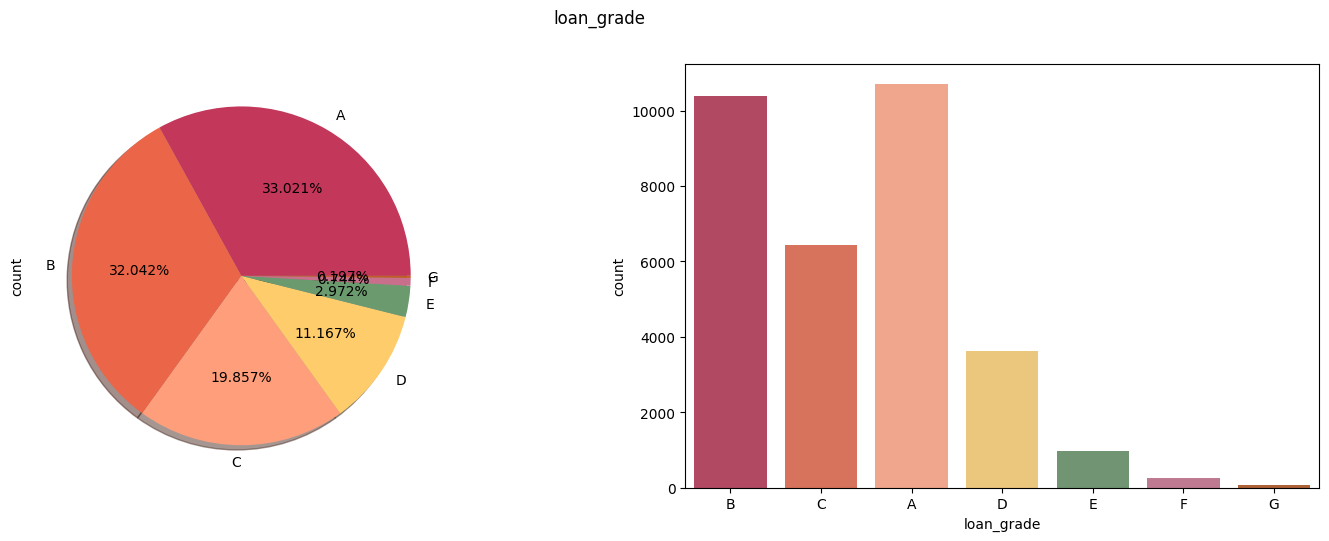

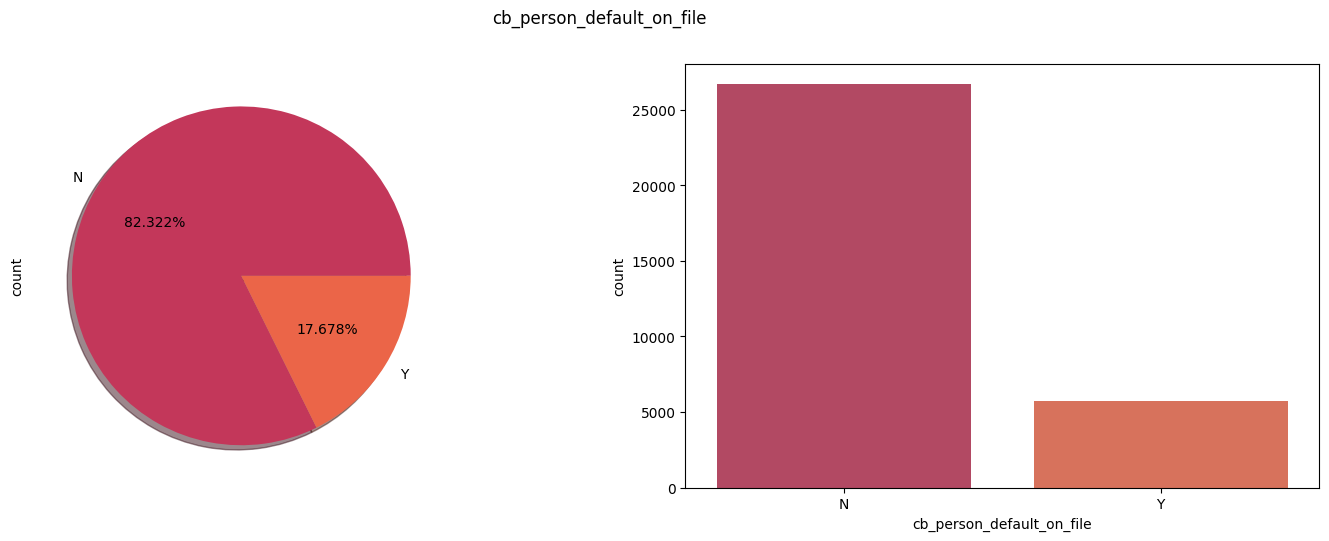

In [ ]:
#Variety of categorical columns
base_colors = ['#C3375A', '#EB6548', '#FF9E7B', '#FECC6A', '#6B9A6E', '#C96F8C', '#C15C24'] #create color palette for figures
cat_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'] #define categorical columns

#for each category in the cat_Columns create a pie and bar chart to show variety
for column in cat_columns :
    f, ax = plt.subplots(1, 2, figsize=(18, 5.5))

    unique_values_count = credit_risk_df[column].nunique() #calculate distinct value counts
    colors = base_colors[:unique_values_count]

    credit_risk_df[column].value_counts().plot.pie(autopct='%1.3f%%', ax=ax[0], shadow=True, colors=colors)
    sns.countplot(x=column, data=credit_risk_df, ax=ax[1], palette=colors)
    plt.suptitle(f'{column}')
    plt.show()

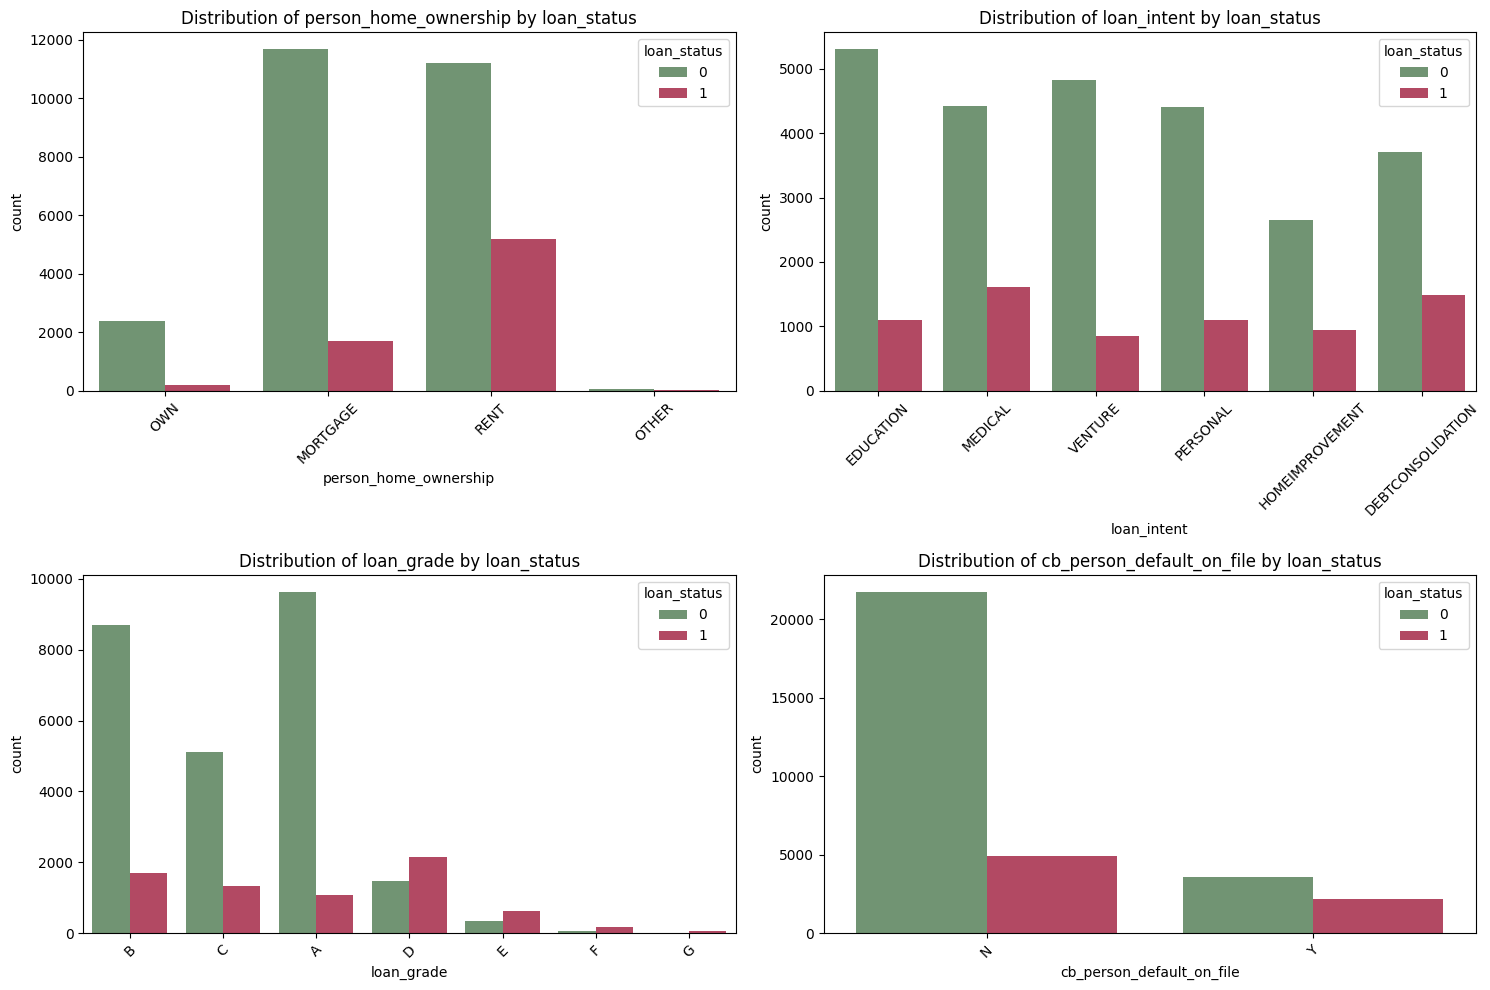

In [ ]:
#Comparing loan status from perspective of categorical columns, correlationship between Categorical Features and Target
#I want to see the distribution of loan status for each catgorical column
target_variable = 'loan_status'

num_cols = 2
num_rows = (len(cat_columns) + 1) // num_cols
color =  ("#6B9A6E","#C3375A")
plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(cat_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=credit_risk_df, x=col, hue=target_variable, palette=color)

    plt.title(f'Distribution of {col} by {target_variable}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


person_home_ownership: The majority of borrowers have a mortgage or rent their house.

loan_intent: The most common loan intents are "EDUCATION" and "MEDICAL".

loan_grade: The distribution of loan grades is skewed towards A, B, C.

cb_person_default_on_file: A significant portion of borrowers have no prior defaults, while a smaller proportion has had defaults.

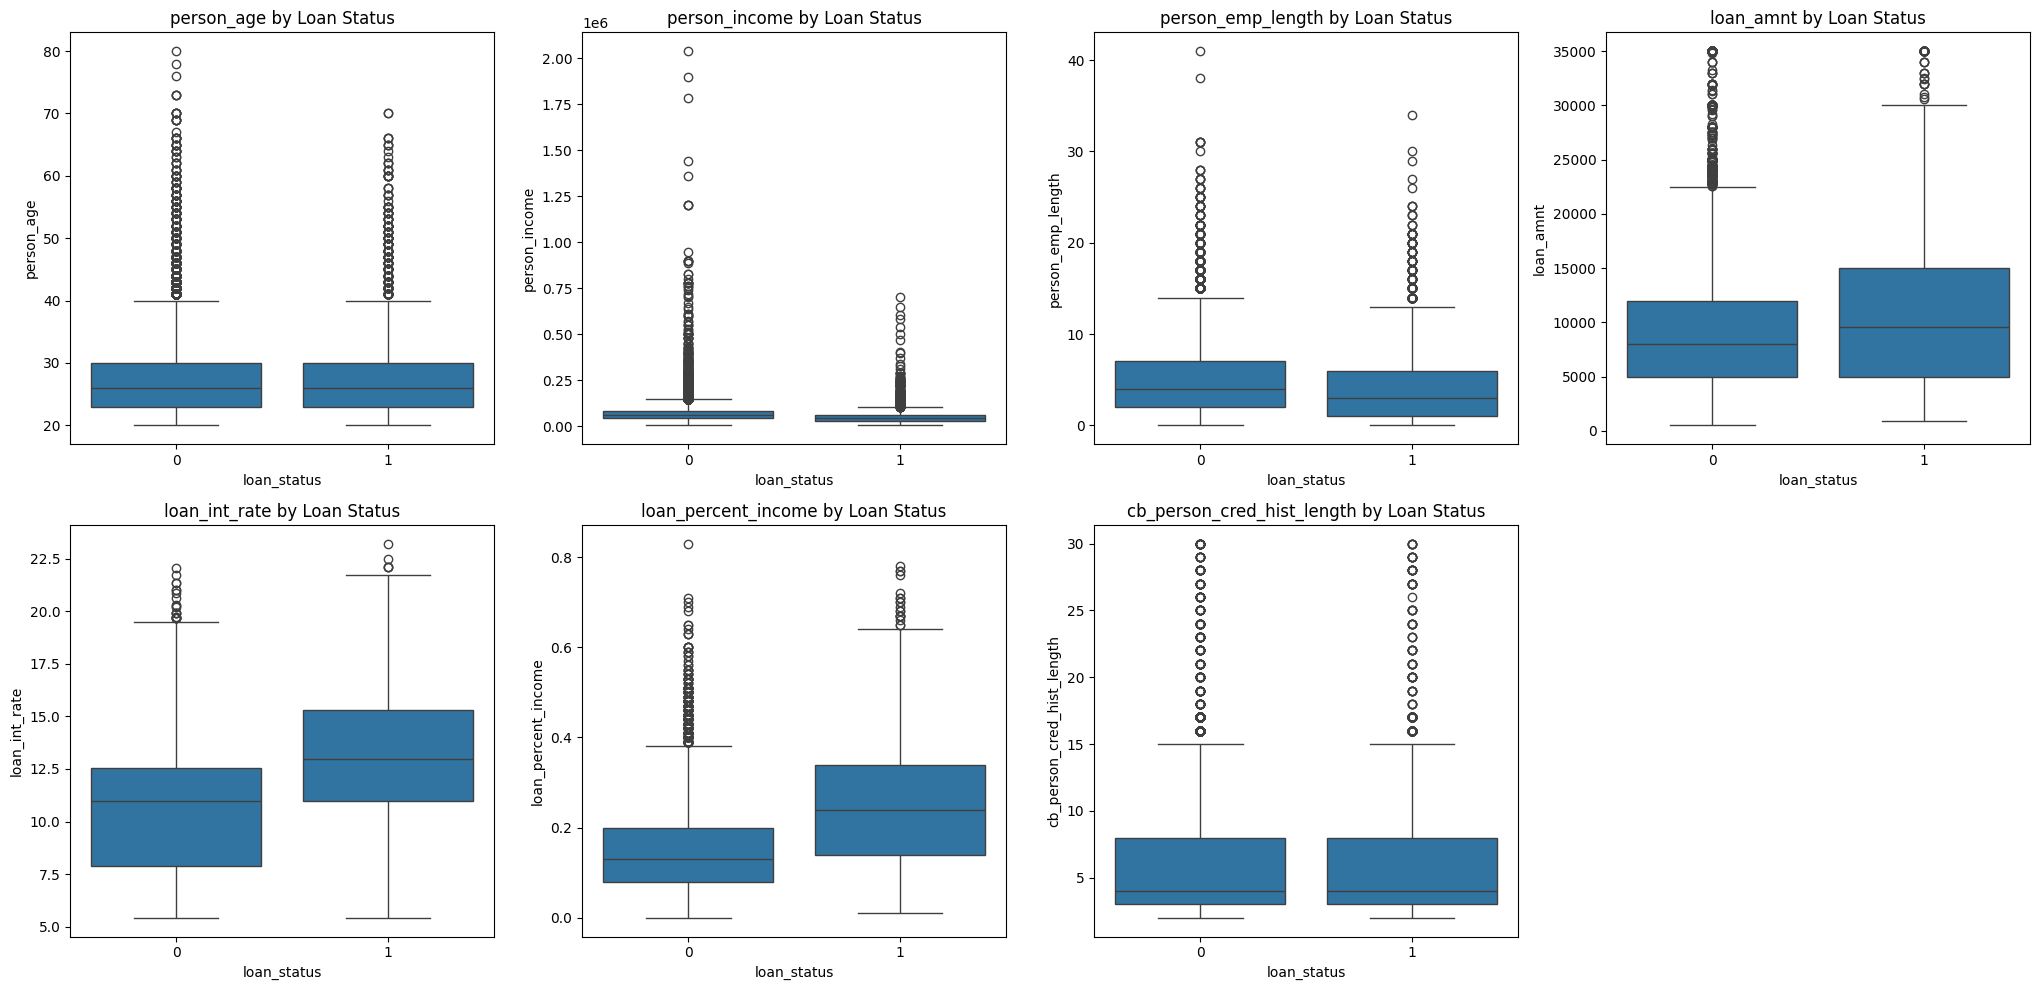

In [ ]:
#Creating same thing for numerical features. Comparing loan status from perspective of numeric colums
plt.figure(figsize=(20.5, 10))
for i, col in enumerate(numeric_data, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='loan_status', y=col, data=credit_risk_df)
    plt.title(f'{col} by Loan Status')
    plt.grid(False)
plt.tight_layout()
plt.show()

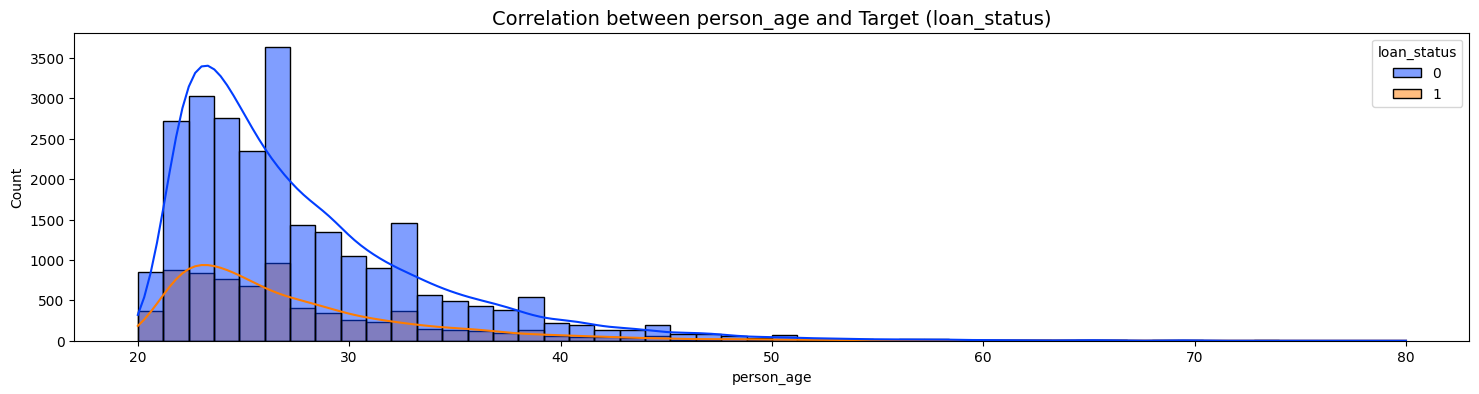

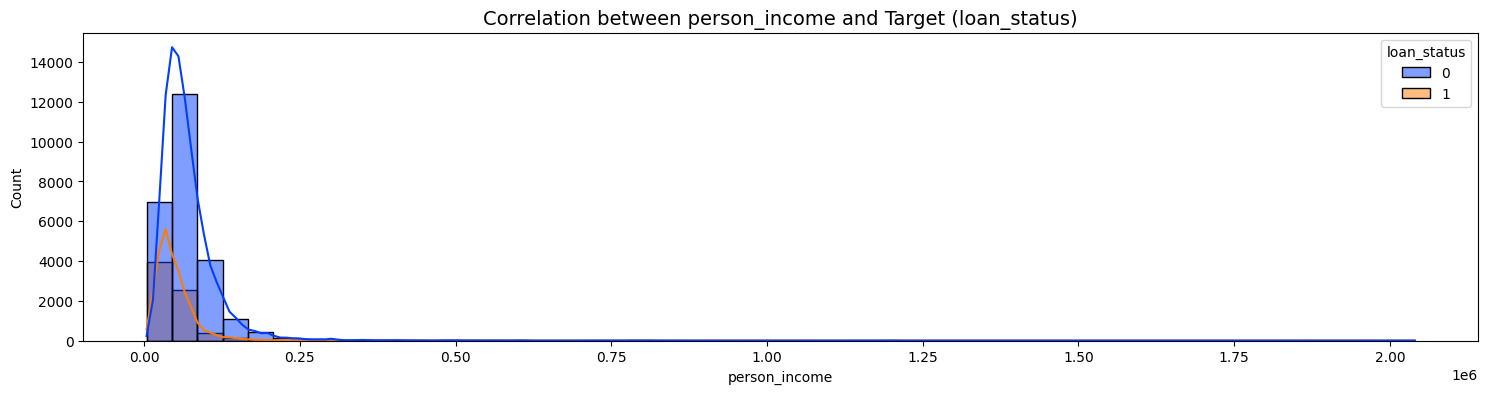

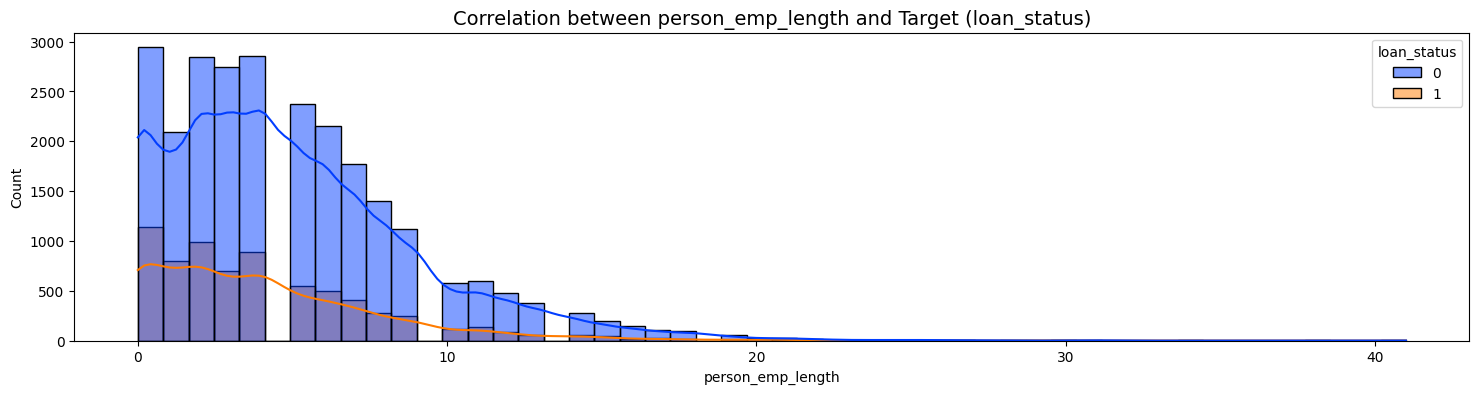

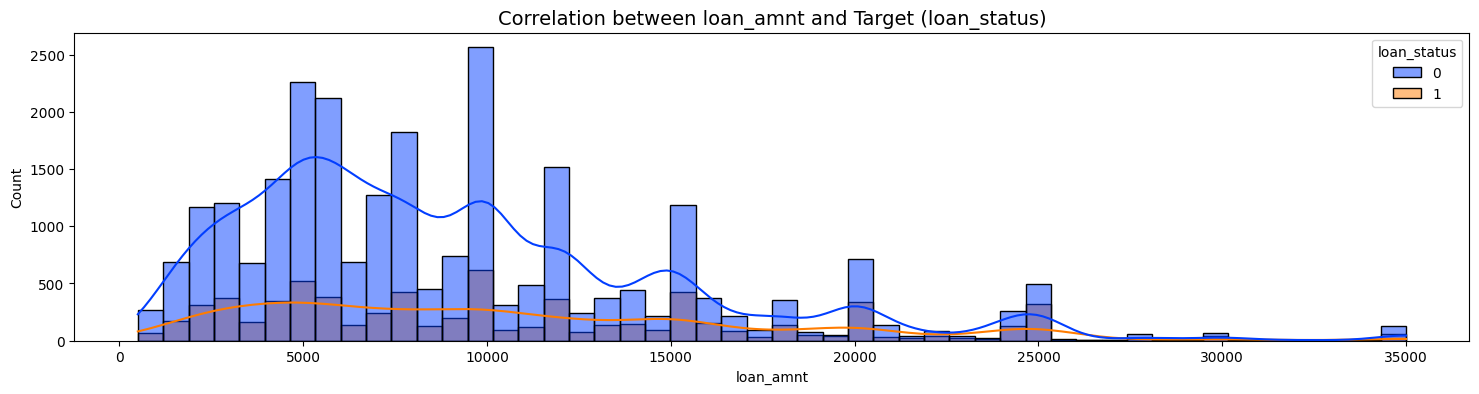

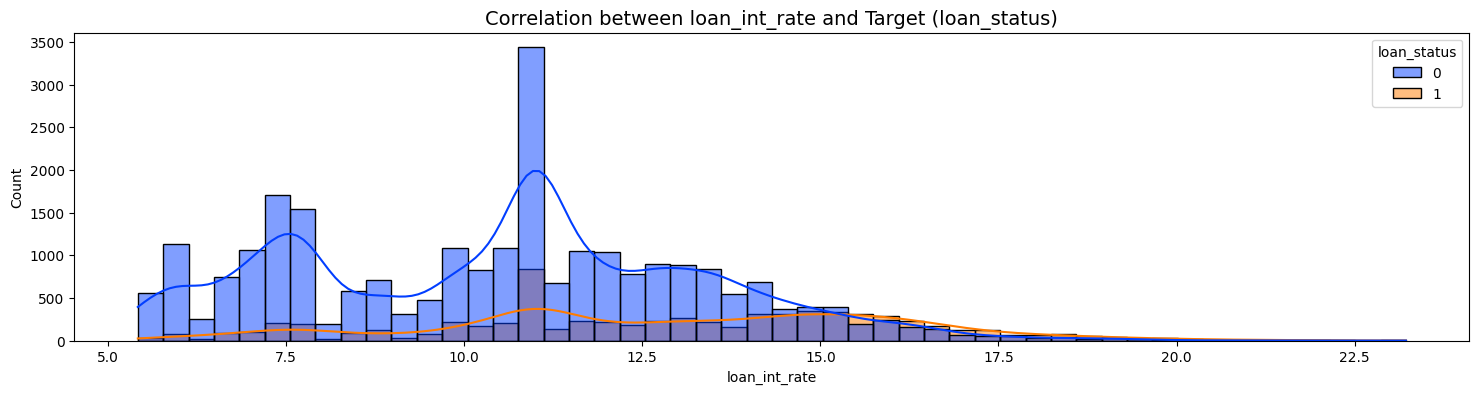

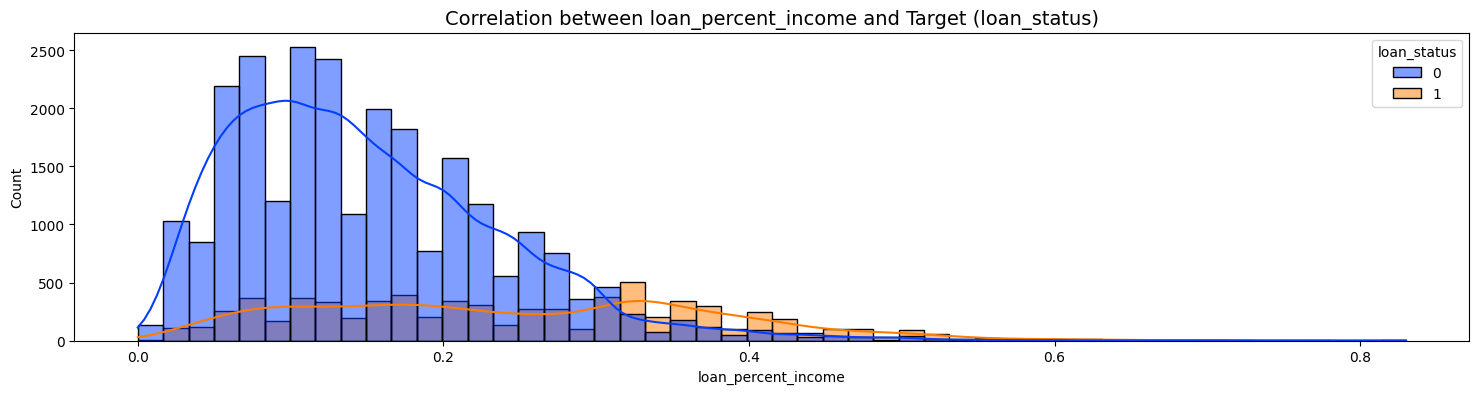

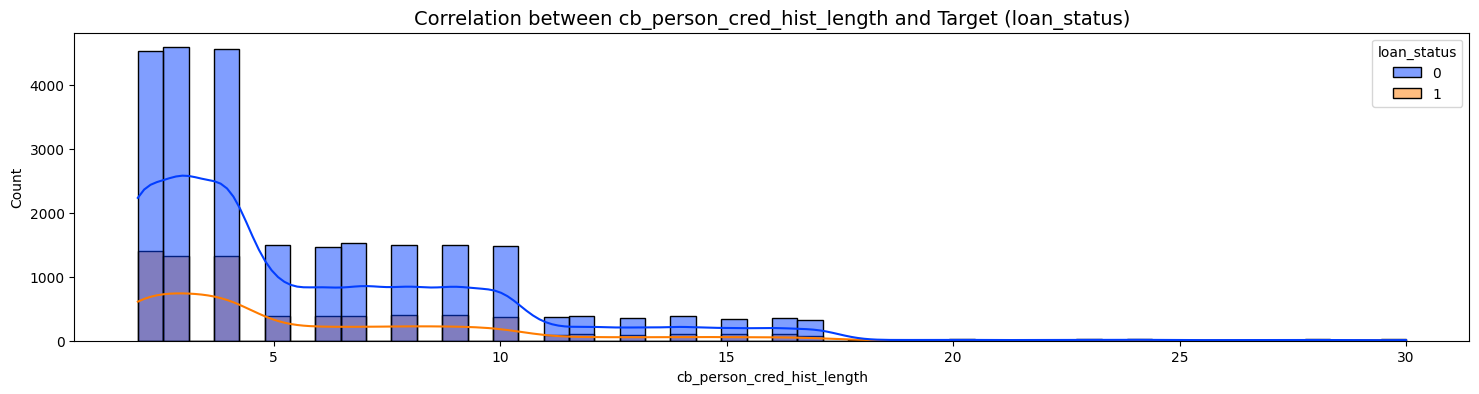

In [ ]:
#Corelations between numerical columns and Target
num_columns=["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]
for column in num_columns :
    fig, ax = plt.subplots(figsize=(18, 4))
    sns.set_palette("bright")
    fig = sns.histplot(data=credit_risk_df, x=column, hue="loan_status", bins=50, kde=True)
    #create a custom title for each figure
    ax.set_title(f'Correlation between {column} and Target (loan_status)', fontsize=14)
    plt.show()

**person age and loan status:**

The distribution of loan status seems to be relatively similar across different age groups. But there is a slight skew towards younger age. Age may not be a strong predictor of loan status.


**person_income:**

The distribution is more skewed towards lower income levels. Income might be a more significant factor than the age in predicting loan status. I will check the corelation rate.

**employment_lengths**

There is a slight skew towards shorter employment lengths but it seems this is not strong predictor also.

**loan_amoutnt and loan_int_rate**

There's a clear difference in the distribution of them for low and high loan amounts & rates. They may be a good predictor.

**loan_percent_income**
I can say that distribution of loan status is more skewed towards lower loan percent income and the distribition of loan status is quiet different.



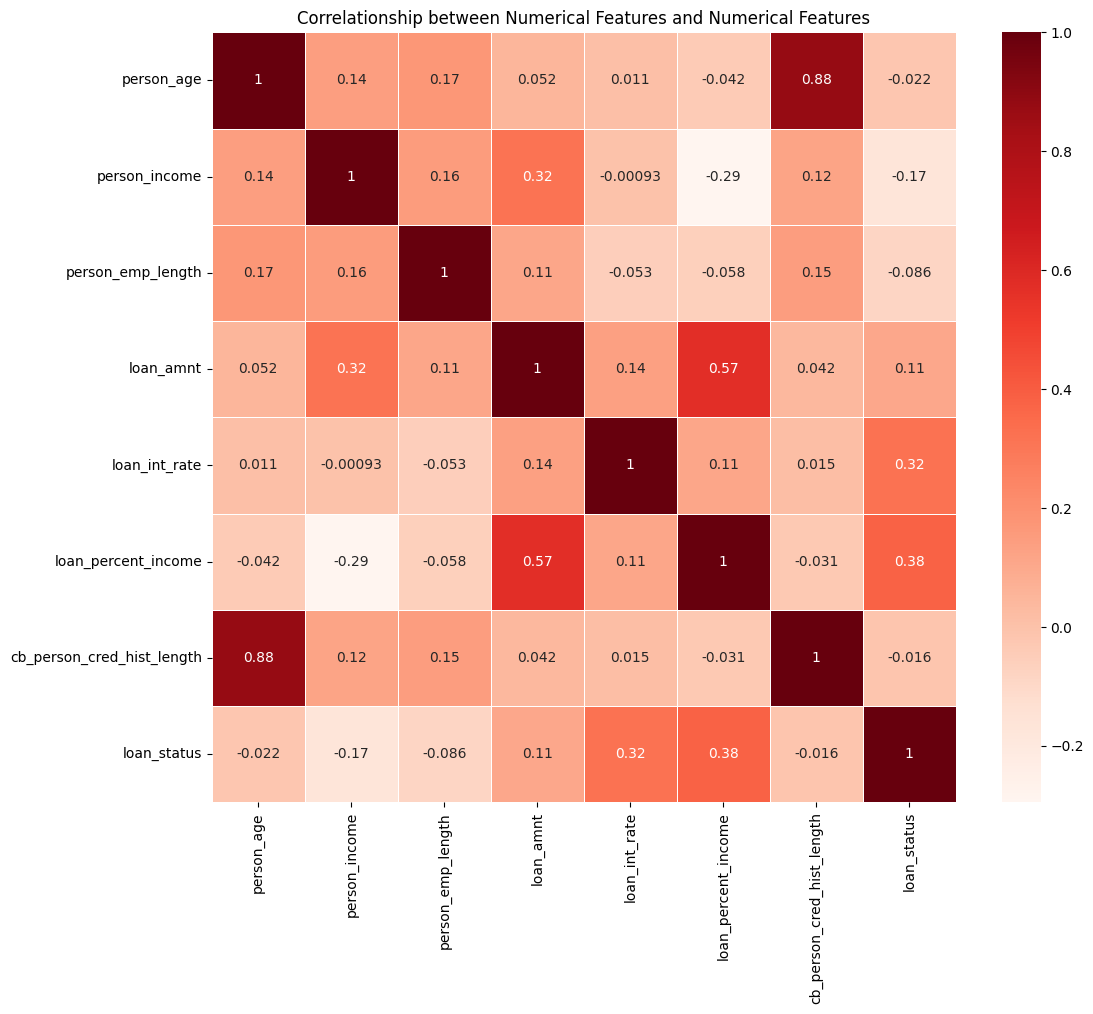

In [ ]:
#Corelations between numerical columns by using heatmap
corr_matrix = credit_risk_df[["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length","loan_status"]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', linewidths=0.5)
plt.title('Correlationship between Numerical Features and Numerical Features')
plt.show()

There are really strong relationship between cb_person_cred_hist_length and person_age. I will not use both of them at the same time during fitting model. Age relatevly has more corelated with the target.Loan_percent_income and loan_amnt will be not used at the same time for the same reason.

Loan_status has positevely corelated between "loan_percent_income" and "loan_int_rate" compared to other numerical features.

By considering corelaion ratio, I will define feature groups to use.

# **9. Feature Engineering**



>I decided to categorize age and emp_legth, because different age group have different risk profiles. By grouping age, I may capture relationship with the loan_status

>For emp_length, because of the same reason I also categorized it

>I will use SelectKBest to find most effective feature combination that I can use to fit models.

> I also created PCA metrics to define new effective features by aiming reducing the number of features

In [ ]:
#Creating dataframe representing categorical and numeric features
continuous_features = ['person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'loan_percent_income']
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

#Grouping age
age_bins = [0, 25, 35, 45, 60, 120]
age_labels = ['Youth', 'Young Adult', 'Middle-Aged', 'Senior', 'Old']
credit_risk_df['age_group'] = pd.cut(credit_risk_df['person_age'], bins=age_bins, labels=age_labels, right=False)

#Grouping emp_length
emp_length_bins = [-1, 0, 5, 10, 20, 120]
emp_length_labels = ['Unemployed', '0-5 years', '6-10 years', '11-20 years', '21+ years']
credit_risk_df['emp_length_group'] = pd.cut(credit_risk_df['person_emp_length'], bins=emp_length_bins, labels=emp_length_labels, right=False)

#scaling numerical features by standarzing it
scaler = StandardScaler()
credit_risk_df[continuous_features] = scaler.fit_transform(credit_risk_df[continuous_features])

#for the categorical features I will use one_hot_encoder to encode them
#create function
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first,dtype=int)
    return dataframe

#execute function of one hot encoder
credit_risk_df = one_hot_encoder(credit_risk_df, categorical_cols, drop_first=True)

#tadd encoded features
credit_risk_df['age_group_encoded'] = LabelEncoder().fit_transform(credit_risk_df['age_group'])
credit_risk_df['emp_length_group_encoded'] = LabelEncoder().fit_transform(credit_risk_df['emp_length_group'])

#dropping the original categorical columns because I created encoded ones.
credit_risk_df.drop(columns=['age_group','person_age','person_emp_length' ,'emp_length_group'], inplace=True)

In [ ]:
#I will use principal component analysis to reduce the number of features. They will keep the most important information for numerical features
pca = PCA(n_components=2)
df_pca = pca.fit_transform(credit_risk_df[continuous_features])
credit_risk_df['PCA1'] = df_pca[:, 0]
credit_risk_df['PCA2'] = df_pca[:, 1]

#seperating target column from dataset
X = credit_risk_df.drop(columns=['loan_status'])
y = credit_risk_df['loan_status']

#I will use seleck k best method based on anova f-test to define best features that I can use during model fitting.
selector = SelectKBest(f_classif, k=10) #10 features will be listed
X_new = selector.fit_transform(X, y) #assign selected feature to new variable

#show selected feature names. These feature combination will be used in the model application part.
selected_features = X.columns[selector.get_support()]
print("Selected Features: ", selected_features)

Selected Features:  Index(['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'person_home_ownership_RENT', 'loan_grade_D', 'loan_grade_E',
       'cb_person_default_on_file_Y', 'PCA1', 'PCA2'],
      dtype='object')


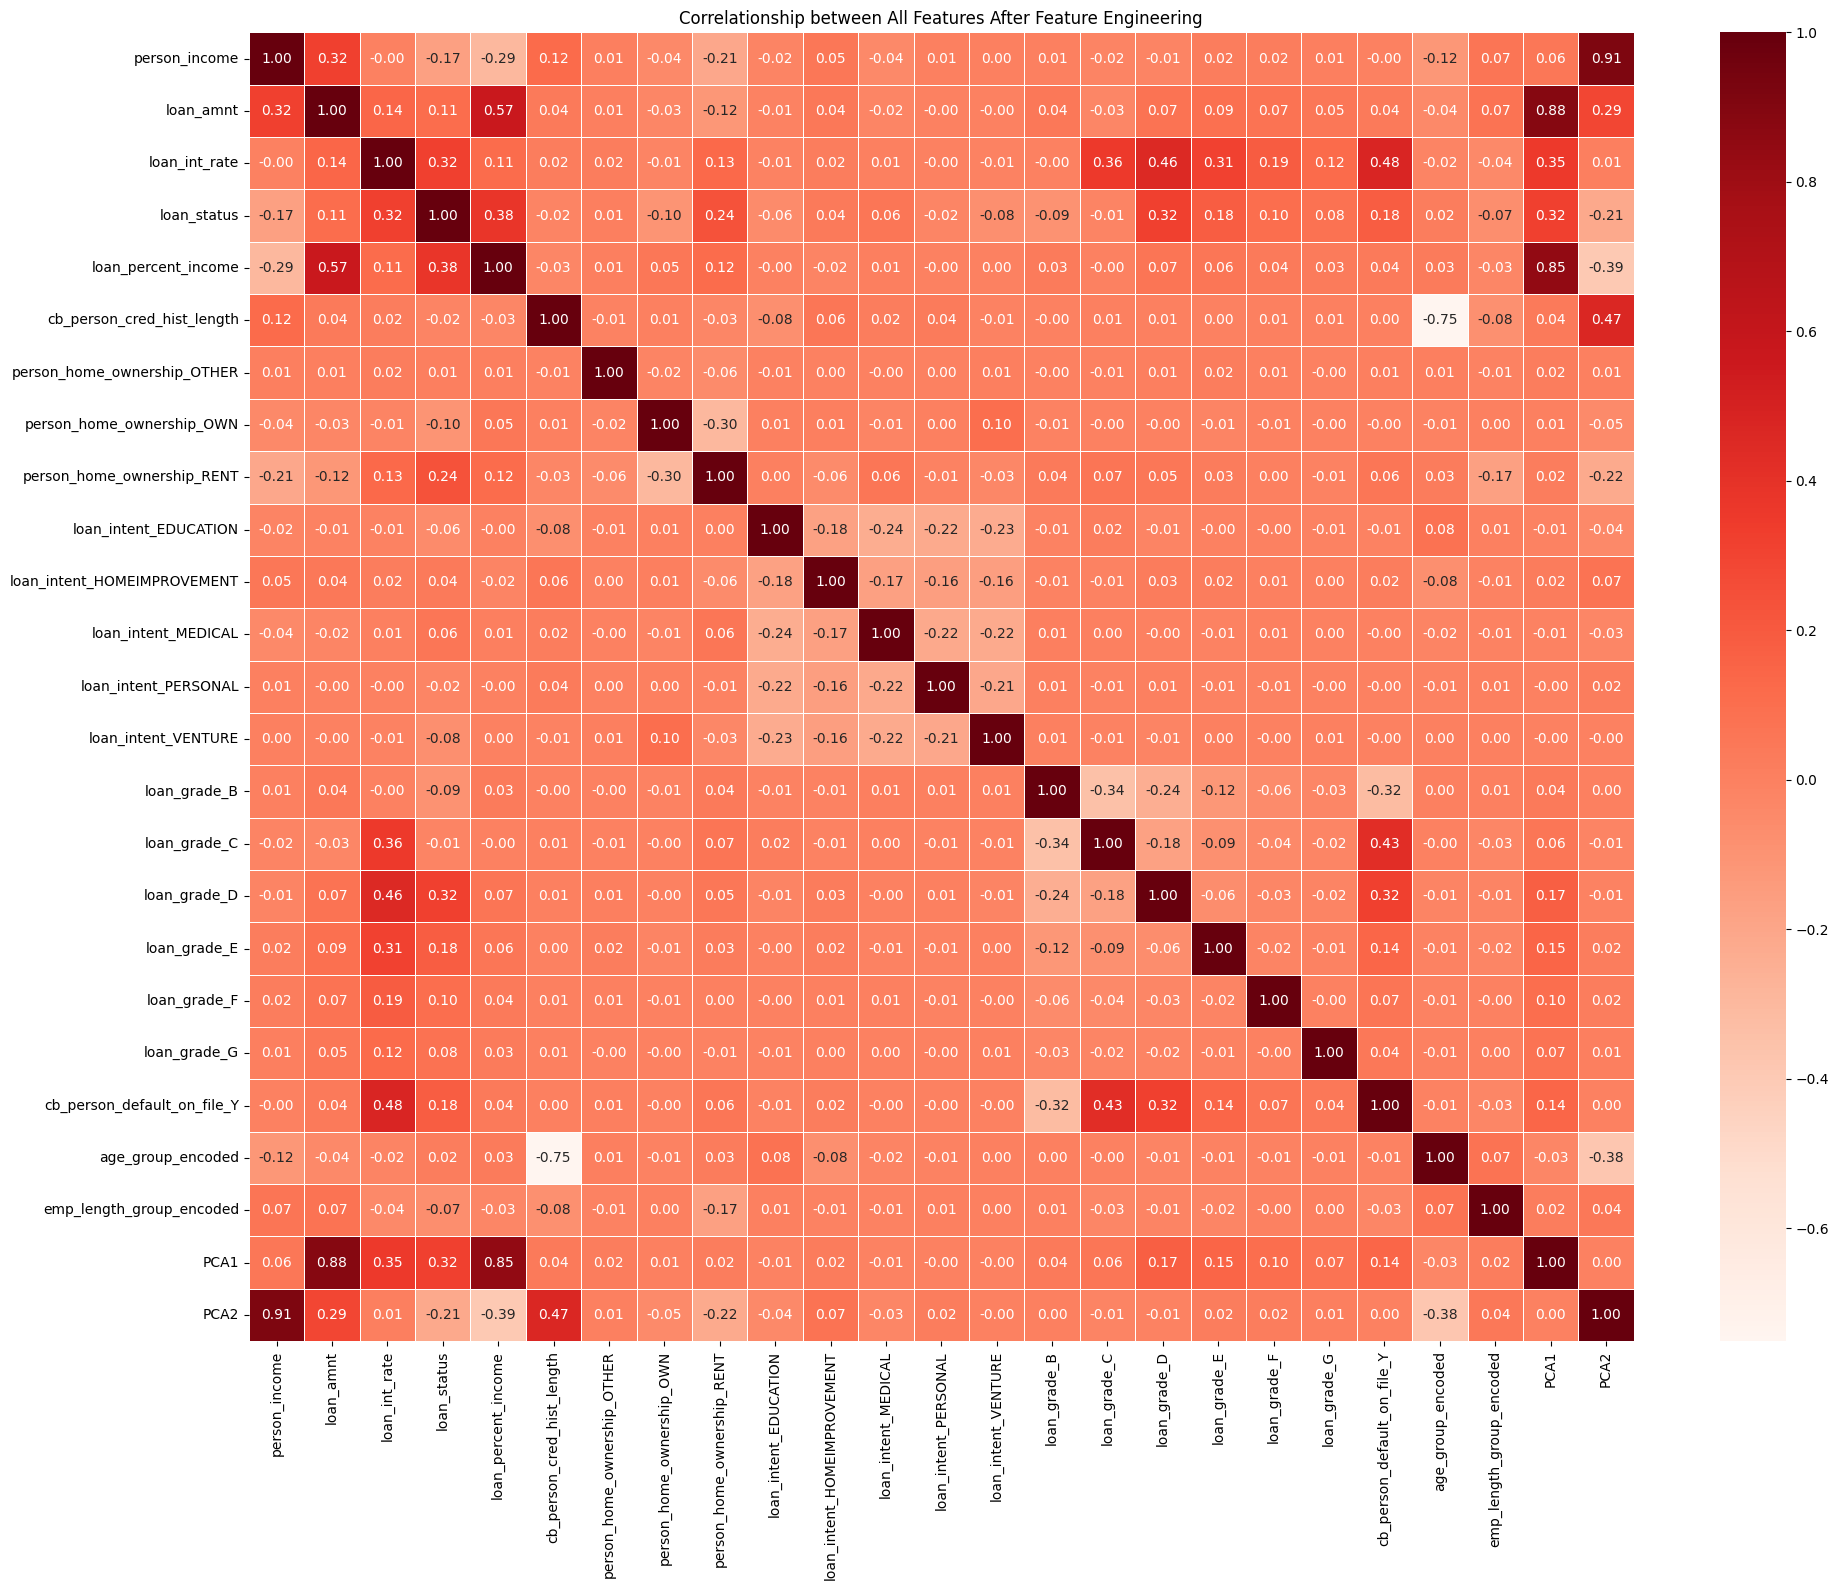

In [ ]:
#Corelation after feature engineering
corr_matrix_2 = credit_risk_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix_2, annot=True, cmap='Reds', linewidths=0.5, fmt=".2f") #I format it to make it more readable
plt.title('Correlationship between All Features After Feature Engineering')
plt.tight_layout()
plt.show()


# **10. Applying Models**

LogisticRegression, SVM, K-Nearest, DesicionTree, RandomForest models will be used to fit dataset.

I will use 3 different feature groups and train all group with the same models and at the end I will compare them and choose the best performed one.

### **Train Models with All Features to see Feature Importance**

First, I will put all features to RandomForest in order to see feature importance. Based on these results I will create new feature groups.

I will calculate weight to minimize negative effect of imbalanced data as I mentioned earlier.

In [ ]:
#split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=42)

#measure class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_all), y=y_train_all)
class_weights_dict = dict(enumerate(class_weights))

#random forest model with class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights_dict)

#train model
rf_model.fit(X_train_all, y_train_all)  # Use X_train_all and y_train_all for training with all features

#prediction and evaulation by using ROC AUC metric
y_pred_rf_all = rf_model.predict(X_test_all)
auc_rf_all = roc_auc_score(y_test_all, y_pred_rf_all)
print("Random Forest (All Features) ROC AUC:", auc_rf_all)

print("Classification Report:")
print(classification_report(y_test_all, y_pred_rf_all))

#list feature Importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train_all.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Random Forest (All Features) ROC AUC: 0.8371492436136903
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5088
           1       0.91      0.69      0.79      1394

    accuracy                           0.92      6482
   macro avg       0.92      0.84      0.87      6482
weighted avg       0.92      0.92      0.92      6482

Feature Importances:
                        Feature  Importance
3           loan_percent_income    0.144885
2                 loan_int_rate    0.134052
0                 person_income    0.127864
22                         PCA1    0.108170
23                         PCA2    0.104572
1                     loan_amnt    0.063382
15                 loan_grade_D    0.057839
7    person_home_ownership_RENT    0.052189
4    cb_person_cred_hist_length    0.035710
6     person_home_ownership_OWN    0.017638
21     emp_length_group_encoded    0.017429
19  cb_person_default_on_file_Y    0.015734


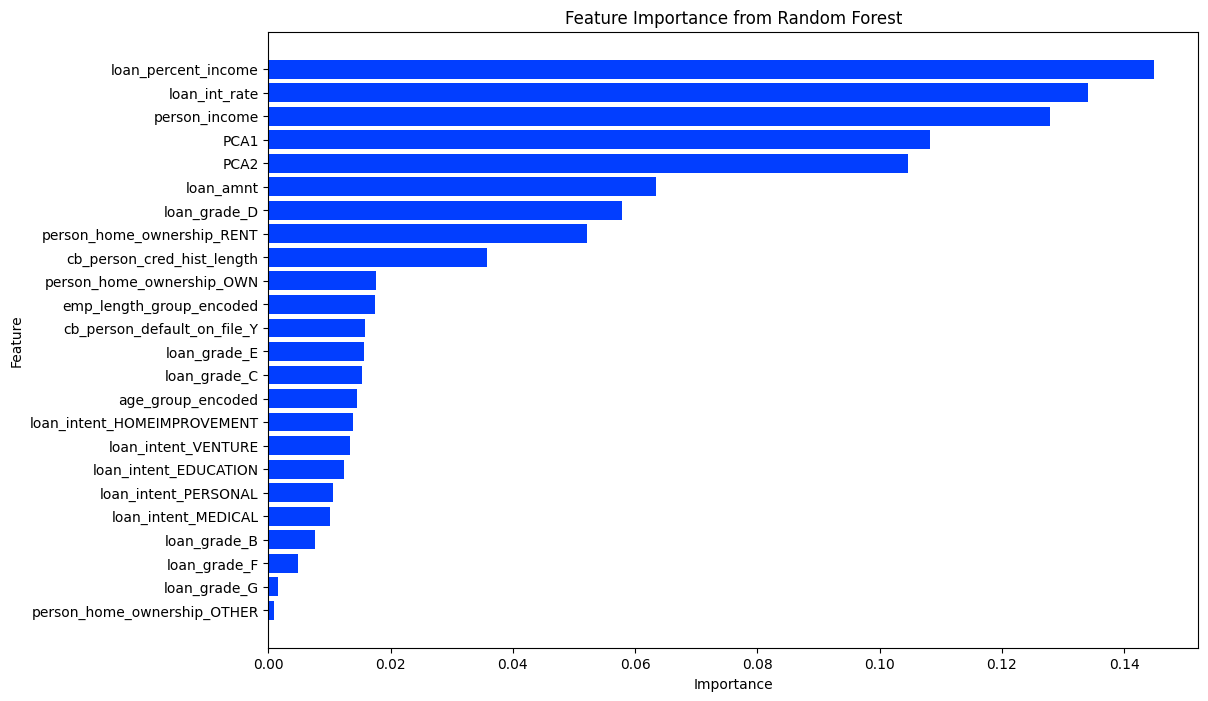

In [ ]:
#visualize the results of feature importace by using bar chart
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis() #ordering importance
plt.show()


### **Train Models with Selected Features (SelectKBest):**
Based on the results of SlectKBest, these features are selected. I will put this feature into models to see accuracy and succsess rate.

Selected features;
'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'person_home_ownership_RENT', 'loan_grade_D', 'loan_grade_E',
       'cb_person_default_on_file_Y', 'PCA1', 'PCA2

In [ ]:
#split the data into training and testing sets for selected features
X_train_selected_K, X_test_selected_K, y_train_K, y_test_K = train_test_split(X_new, y, test_size=0.2, random_state=42)

#define models that I am gonna train my model by considering imblance situation
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'SVM': SVC(class_weight='balanced', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42)
}

#create func for model evaluation
def evaluate_models(models, X_train_selected_K, y_train_K, X_test_selected_K, y_test_K):
    results_KBest = {}
    for name, model in models.items():
        model.fit(X_train_selected_K, y_train_K)
        y_pred_KBest = model.predict(X_test_selected_K)

        acc = accuracy_score(y_test_K, y_pred_KBest)
        f1 = f1_score(y_test_K, y_pred_KBest)
        cm = confusion_matrix(y_test_K, y_pred_KBest)

        #metrics that I am gonna use for comparison models
        results_KBest[name] = {
            'Accuracy': acc,
            'F1 Score': f1,
            'Confusion Matrix': cm
        }

        print(f"Model: {name}")
        print(f"Accuracy: {acc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")
        print("\n" + "-"*30 + "\n")

    return results_KBest

#evaluate it
model_results_KBest = evaluate_models(models, X_train_selected_K, y_train_K, X_test_selected_K, y_test_K)


Model: Logistic Regression
Accuracy: 0.8002
F1 Score: 0.6203
Confusion Matrix:
[[4129  959]
 [ 336 1058]]

------------------------------

Model: Decision Tree
Accuracy: 0.8507
F1 Score: 0.6505
Confusion Matrix:
[[4613  475]
 [ 493  901]]

------------------------------

Model: SVM
Accuracy: 0.8588
F1 Score: 0.6924
Confusion Matrix:
[[4537  551]
 [ 364 1030]]

------------------------------

Model: K-Nearest Neighbors
Accuracy: 0.8686
F1 Score: 0.6511
Confusion Matrix:
[[4835  253]
 [ 599  795]]

------------------------------

Model: Random Forest
Accuracy: 0.8908
F1 Score: 0.7115
Confusion Matrix:
[[4901  187]
 [ 521  873]]

------------------------------



### **Train Models with Selected Features_2:**

In [ ]:
#I define new feature groups based on corelation, feature importance and selectkbest.
X = credit_risk_df[["person_income","loan_amnt","loan_int_rate","loan_percent_income","person_home_ownership_RENT","loan_grade_D","cb_person_cred_hist_length","emp_length_group_encoded","person_home_ownership_OWN","loan_grade_E"]] # All features
y = credit_risk_df['loan_status']
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X, y, test_size=0.2, random_state=42)

#I execute same code blocks with the previous section in order to evaluate models with new feature group
def evaluate_models(models, X_train_selected, y_train_selected, X_test_selected, y_test_selected):
    results_list_2 = {}
    for name, model in models.items():
        model.fit(X_train_selected, y_train_selected)
        y_pred_2= model.predict(X_test_selected)

        acc = accuracy_score(y_test_selected, y_pred_2)
        f1 = f1_score(y_test_selected, y_pred_2)
        cm = confusion_matrix(y_test_selected, y_pred_2)

        results_list_2[name] = {
            'Accuracy': acc,
            'F1 Score': f1,
            'Confusion Matrix': cm
        }

        print(f"Model: {name}")
        print(f"Accuracy: {acc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")
        print("\n" + "-"*30 + "\n")

    return results_list_2
model_results_2 = evaluate_models(models, X_train_selected, y_train_selected, X_test_selected, y_test_selected)


Model: Logistic Regression
Accuracy: 0.8019
F1 Score: 0.6215
Confusion Matrix:
[[4144  944]
 [ 340 1054]]

------------------------------

Model: Decision Tree
Accuracy: 0.8593
F1 Score: 0.6768
Confusion Matrix:
[[4615  473]
 [ 439  955]]

------------------------------

Model: SVM
Accuracy: 0.8604
F1 Score: 0.6944
Confusion Matrix:
[[4549  539]
 [ 366 1028]]

------------------------------

Model: K-Nearest Neighbors
Accuracy: 0.8718
F1 Score: 0.6621
Confusion Matrix:
[[4837  251]
 [ 580  814]]

------------------------------

Model: Random Forest
Accuracy: 0.9003
F1 Score: 0.7399
Confusion Matrix:
[[4917  171]
 [ 475  919]]

------------------------------



### **Train Models with Selected Features_3**

In [ ]:
X= credit_risk_df[["loan_percent_income", "person_income", "loan_int_rate", "PCA1", "PCA2", "cb_person_cred_hist_length", "emp_length_group_encoded","person_home_ownership_RENT"]]
y = credit_risk_df['loan_status']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_models(models, X_train_3, y_train_3, X_test_3, y_test_3):
    results_list_3 = {}
    for name, model in models.items():
        model.fit(X_train_3, y_train_3)
        y_pred_3= model.predict(X_test_3)

        acc = accuracy_score(y_test_3, y_pred_3)
        f1 = f1_score(y_test_3, y_pred_3)
        cm = confusion_matrix(y_test_3, y_pred_3)

        results_list_3[name] = {
            'Accuracy': acc,
            'F1 Score': f1,
            'Confusion Matrix': cm
        }

        print(f"Model: {name}")
        print(f"Accuracy: {acc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")
        print("\n" + "-"*30 + "\n")

    return results_list_3

model_results_3 = evaluate_models(models, X_train_3, y_train_3, X_test_3, y_test_3)

Model: Logistic Regression
Accuracy: 0.7581
F1 Score: 0.5673
Confusion Matrix:
[[3886 1202]
 [ 366 1028]]

------------------------------

Model: Decision Tree
Accuracy: 0.8477
F1 Score: 0.6476
Confusion Matrix:
[[4588  500]
 [ 487  907]]

------------------------------

Model: SVM
Accuracy: 0.8323
F1 Score: 0.6481
Confusion Matrix:
[[4394  694]
 [ 393 1001]]

------------------------------

Model: K-Nearest Neighbors
Accuracy: 0.8647
F1 Score: 0.6254
Confusion Matrix:
[[4873  215]
 [ 662  732]]

------------------------------

Model: Random Forest
Accuracy: 0.8912
F1 Score: 0.6986
Confusion Matrix:
[[4960  128]
 [ 577  817]]

------------------------------



## **Comparison Model**

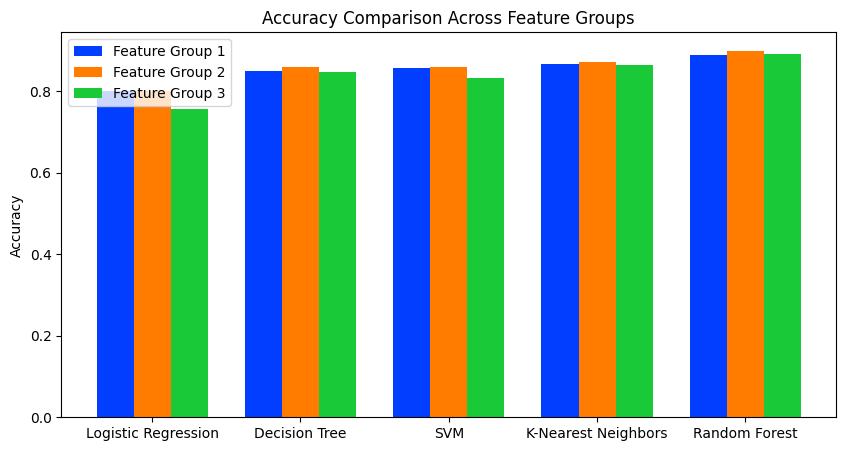

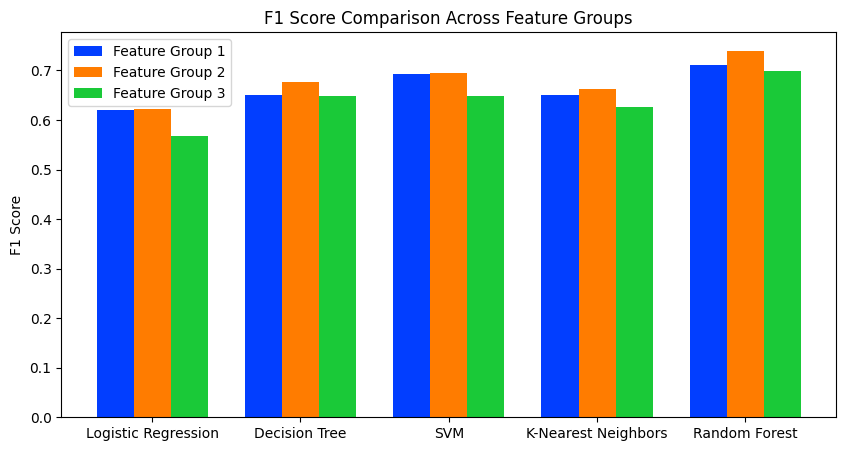

In [ ]:
#I want to compare all results for 3 different feature groups and 5 different models
#create func
def extract_scores(model_results, metric):
    models = list(model_results.keys())
    scores = [model_results[model][metric] for model in models]
    return models, scores

#extract accuracy and f1 score to compare
models, acc_scores_1 = extract_scores(model_results_KBest, 'Accuracy')
_, acc_scores_2 = extract_scores(model_results_2, 'Accuracy')
_, acc_scores_3 = extract_scores(model_results_3, 'Accuracy')

_, f1_scores_1 = extract_scores(model_results_KBest, 'F1 Score')
_, f1_scores_2 = extract_scores(model_results_2, 'F1 Score')
_, f1_scores_3 = extract_scores(model_results_3, 'F1 Score')

#plotting accuracy
plt.figure(figsize=(10, 5))
x = np.arange(len(models))
width = 0.25

plt.bar(x - width, acc_scores_1, width, label='Feature Group 1')
plt.bar(x, acc_scores_2, width, label='Feature Group 2')
plt.bar(x + width, acc_scores_3, width, label='Feature Group 3')

plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Across Feature Groups')
plt.xticks(x, models)
plt.legend()
plt.show()

#plotting F1 score
plt.figure(figsize=(10, 5))
plt.bar(x - width, f1_scores_1, width, label='Feature Group 1')
plt.bar(x, f1_scores_2, width, label='Feature Group 2')
plt.bar(x + width, f1_scores_3, width, label='Feature Group 3')

plt.ylabel('F1 Score')
plt.title('F1 Score Comparison Across Feature Groups')
plt.xticks(x, models)
plt.legend()
plt.show()

Based on results the Random Forest model gets the highest accuracy score with Feaute Group 2 with 0.90. Also its F1 Score the highest one with (0.73), given that the dataset is imbalanced focusing on F1 and confusion matrix is crucial.  I will go forward with Random Forest and Feature Group 2 during ensembling model.

# **11.Ensembling Model**

I will try to improve results by using bagging, stacking, boosting techniques with different models in order. Based on the Accuracy, F1 and confusion matrix i will choose the best one.

In [ ]:
#First I am gonna apply voting ensemble model for RandomForest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

#ensemble model with voting
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

#train the ensemble model
ensemble_model.fit(X_train_selected, y_train_selected)

y_pred = ensemble_model.predict(X_test_selected)

#evaulate it
accuracy = accuracy_score(y_test_selected, y_pred)
f1 = f1_score(y_test_selected, y_pred)
confusion = confusion_matrix(y_test_selected, y_pred)

print(f"Ensemble Model: Voting Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{confusion}")


Ensemble Model: Voting Classifier
Accuracy: 0.9006
F1 Score: 0.7397
Confusion Matrix:
[[4923  165]
 [ 479  915]]


In [ ]:
# Define the models
svm = SVC(class_weight='balanced', probability=True)  # Use probability=True for soft voting
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[('svm', svm), ('rf', rf)], voting='soft')  # Using 'soft' for probability-based voting

# Train the Voting Classifier
voting_clf.fit(X_train_selected, y_train_selected)

# Evaluate the Voting Classifier
y_pred_voting = voting_clf.predict(X_test_selected)

# Calculate evaluation metrics
voting_accuracy = accuracy_score(y_test_selected, y_pred_voting)
voting_f1 = f1_score(y_test_selected, y_pred_voting)
voting_cm = confusion_matrix(y_test_selected, y_pred_voting)

print(f"Voting Model (SVM + Random Forest) Accuracy: {voting_accuracy}")
print(f"Voting Model (SVM + Random Forest) F1 Score: {voting_f1}")
print(f"Voting Model (SVM + Random Forest) Confusion Matrix:\n{voting_cm}")


Voting Model (SVM + Random Forest) Accuracy: 0.8970996605985807
Voting Model (SVM + Random Forest) F1 Score: 0.7399610136452242
Voting Model (SVM + Random Forest) Confusion Matrix:
[[4866  222]
 [ 445  949]]


In [ ]:
#use bagging method for Desicion Tree
#using Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), random_state=42)
bagging_clf.fit(X_train_selected, y_train_selected)

# Evaluate Bagging Classifier
y_pred_bag = bagging_clf.predict(X_test_selected)

#evaluation metrics for Bagging
bag_accuracy = accuracy_score(y_test_selected, y_pred_bag)
bag_f1 = f1_score(y_test_selected, y_pred_bag)
bag_cm = confusion_matrix(y_test_selected, y_pred_bag)

print(f"Bagging Model Accuracy: {bag_accuracy}")
print(f"Bagging Model F1 Score: {bag_f1}")
print(f"Bagging Model Confusion Matrix:\n{bag_cm}")

Bagging Model Accuracy: 0.8954026535020055
Bagging Model F1 Score: 0.7228127555192151
Bagging Model Confusion Matrix:
[[4920  168]
 [ 510  884]]


In [ ]:
# Create the Random Forest as the base estimator for bagging
base_rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the Bagging Classifier with Random Forest
bagging_rf = BaggingClassifier(estimator=base_rf, n_estimators=10, random_state=42)

bagging_rf.fit(X_train_selected, y_train_selected)
y_pred_bag_rf = bagging_rf.predict(X_test_selected)

#calculate evaluation metrics
bagging_rf_accuracy = accuracy_score(y_test_selected, y_pred_bag_rf)
bagging_rf_f1 = f1_score(y_test_selected, y_pred_bag_rf)
bagging_rf_cm = confusion_matrix(y_test_selected, y_pred_bag_rf)

print(f"Bagging with Random Forest Accuracy: {bagging_rf_accuracy}")
print(f"Bagging with Random Forest F1 Score: {bagging_rf_f1}")
print(f"Bagging with Random Forest Confusion Matrix:\n{bagging_rf_cm}")


Bagging with Random Forest Accuracy: 0.8991052144399877
Bagging with Random Forest F1 Score: 0.733278955954323
Bagging with Random Forest Confusion Matrix:
[[4929  159]
 [ 495  899]]


In [ ]:
#Boosting Classifier using Decision Trees
boosting_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), random_state=42)
boosting_clf.fit(X_train_selected, y_train_selected)

#Evaluate Boosting Classifier
y_pred_boost = boosting_clf.predict(X_test_selected)

#calculate evaluation metrics
boost_accuracy = accuracy_score(y_test_selected, y_pred_boost)
boost_f1 = f1_score(y_test_selected, y_pred_boost)
boost_cm = confusion_matrix(y_test_selected, y_pred_boost)

print(f"Boosting Model Accuracy: {boost_accuracy}")
print(f"Boosting Model F1 Score: {boost_f1}")
print(f"Boosting Model Confusion Matrix:\n{boost_cm}")

Boosting Model Accuracy: 0.8855291576673866
Boosting Model F1 Score: 0.7048528241845664
Boosting Model Confusion Matrix:
[[4854  234]
 [ 508  886]]


In [ ]:
#boosting with random forest
base_rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=10)
boosting_rf = AdaBoostClassifier(estimator=base_rf, n_estimators=50, random_state=42)

#training
boosting_rf.fit(X_train_selected, y_train_selected)

#evaluate it
y_pred_boost_rf = boosting_rf.predict(X_test_selected)

#evaluation metrics
boosting_rf_accuracy = accuracy_score(y_test_selected, y_pred_boost_rf)
boosting_rf_f1 = f1_score(y_test_selected, y_pred_boost_rf)
boosting_rf_cm = confusion_matrix(y_test_selected, y_pred_boost_rf)

print(f"Boosting with Random Forest Accuracy: {boosting_rf_accuracy}")
print(f"Boosting with Random Forest F1 Score: {boosting_rf_f1}")
print(f"Boosting with Random Forest Confusion Matrix:\n{boosting_rf_cm}")


Boosting with Random Forest Accuracy: 0.8975624807158284
Boosting with Random Forest F1 Score: 0.7348242811501597
Boosting with Random Forest Confusion Matrix:
[[4898  190]
 [ 474  920]]


In [ ]:
#stacking with KNN and Random Forest
base_models = [
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
]

meta_model = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train_selected, y_train_selected)
y_pred_stacking = stacking_clf.predict(X_test_selected)

stacking_accuracy = accuracy_score(y_test_selected, y_pred_stacking)
stacking_f1 = f1_score(y_test_selected, y_pred_stacking)
stacking_cm = confusion_matrix(y_test_selected, y_pred_stacking)

print(f"Stacking Model (KNN + Random Forest) Accuracy: {stacking_accuracy}")
print(f"Stacking Model (KNN + Random Forest) F1 Score: {stacking_f1}")
print(f"Stacking Model (KNN + Random Forest) Confusion Matrix:\n{stacking_cm}")

Stacking Model (KNN + Random Forest) Accuracy: 0.9009564949089787
Stacking Model (KNN + Random Forest) F1 Score: 0.7448330683624801
Stacking Model (KNN + Random Forest) Confusion Matrix:
[[4903  185]
 [ 457  937]]


I tried 7 different combination to find best ensembled model for data. So far, I used bagging, stacking with different model combinations, boosting. and voting.


>Best Model: Stacking Model (KNN + Random Forest)

>F1 Score: 0.745 (highest among all models).

>The model accuracy rate is high, I will focus on F1 score and confusion matrix because the data is imbalanced. F1 Score help me to measure the balance precision and recall. I will also pay attention to keep reducing the False negatives to mitigate financial risks of giving money to customers who won't pay back.


# **12. Hyperparameter Tuning and Model Evaluations**

>Increase F1 Score, reduce False Negative.

I try to reach better F1 score by changing hyperparameters for the best model (KNN+Random Forest)

In [ ]:
#gridsearchcv for tuning
#the best model i defined previous step
base_models = [
    ('knn', KNeighborsClassifier()),  # Default KNN
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))  # Default RandomForest
]
meta_model = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

#the parameters that I decide to change
param_grid = {
    'final_estimator__solver': ['liblinear', 'saga'],
    'final_estimator__C': [0.1, 1, 10],
    'knn__n_neighbors': [3, 5, 7],
}

#gridSearchCV for tuning hyperparameters
grid_search = GridSearchCV(estimator=stacking_clf, param_grid=param_grid, scoring='f1', cv=3)
#Model training and evaulation
grid_search.fit(X_train_selected, y_train_selected)
best_stacking_clf = grid_search.best_estimator_
y_pred_best = best_stacking_clf.predict(X_test_selected)

#Calculate evaluation metrics
best_accuracy = accuracy_score(y_test_selected, y_pred_best)
best_f1 = f1_score(y_test_selected, y_pred_best)
best_cm = confusion_matrix(y_test_selected, y_pred_best)

print(f"Tuned Stacking Model Accuracy: {best_accuracy}")
print(f"Tuned Stacking Model F1 Score: {best_f1}")
print(f"Tuned Stacking Model Confusion Matrix:\n{best_cm}")


Tuned Stacking Model Accuracy: 0.900339401419315
Tuned Stacking Model F1 Score: 0.7434471803018269
Tuned Stacking Model Confusion Matrix:
[[4900  188]
 [ 458  936]]


In [ ]:
#Adjust Class Weights
#Manually adjusting class weights to deal with false negatives more heavily
class_weights = {0: 1, 1: 3}

#random Forest with custom class weights
rf = RandomForestClassifier(class_weight=class_weights, random_state=42)

rf.fit(X_train_selected, y_train_selected)
y_pred_rf = rf.predict(X_test_selected)

rf_accuracy = accuracy_score(y_test_selected, y_pred_rf)
rf_f1 = f1_score(y_test_selected, y_pred_rf)
rf_cm = confusion_matrix(y_test_selected, y_pred_rf)

print(f"Random Forest Model Accuracy: {rf_accuracy}")
print(f"Random Forest Model F1 Score: {rf_f1}")
print(f"Random Forest Model Confusion Matrix:\n{rf_cm}")

Random Forest Model Accuracy: 0.9006479481641468
Random Forest Model F1 Score: 0.7409493161705552
Random Forest Model Confusion Matrix:
[[4917  171]
 [ 473  921]]


In [ ]:
#Find best threshold
#best model
base_models = [
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
]
meta_model = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train_selected, y_train_selected)
y_pred_prob = stacking_clf.predict_proba(X_test_selected)[:, 1]

#Adjusting the threshold to reach a better F1 score
threshold = 0.4
y_pred_threshold = np.where(y_pred_prob > threshold, 1, 0)

# Calculate performance metrics
stacking_accuracy_threshold = accuracy_score(y_test_selected, y_pred_threshold)
stacking_f1_threshold = f1_score(y_test_selected, y_pred_threshold)
stacking_cm_threshold = confusion_matrix(y_test_selected, y_pred_threshold)

# Print results
print(f"Stacking Model (KNN + Random Forest) Accuracy with Threshold: {stacking_accuracy_threshold}")
print(f"Stacking Model (KNN + Random Forest) F1 Score with Threshold: {stacking_f1_threshold}")
print(f"Stacking Model (KNN + Random Forest) Confusion Matrix with Threshold:\n{stacking_cm_threshold}")


Stacking Model (KNN + Random Forest) Accuracy with Threshold: 0.8989509410675718
Stacking Model (KNN + Random Forest) F1 Score with Threshold: 0.7485604606525912
Stacking Model (KNN + Random Forest) Confusion Matrix with Threshold:
[[4852  236]
 [ 419  975]]


By changing threshold I get slightly better F1 score. I will put this into plot to see what is the optimum treshold get better f1 without not losing accuracy too much.

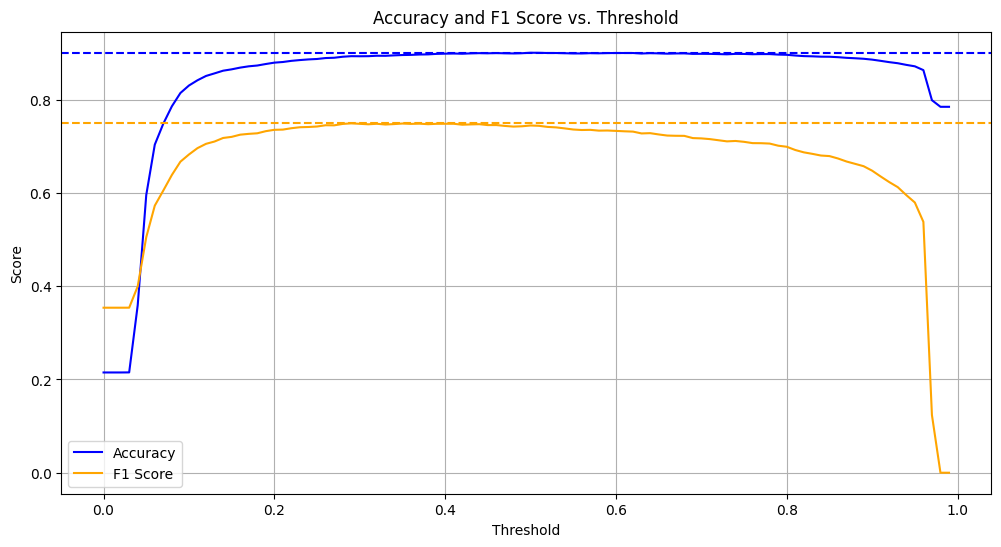

In [ ]:
thresholds = np.arange(0.0, 1.0, 0.01)
accuracy_scores = []
f1_scores = []

#accuracy and F1 score for each threshold
for threshold in thresholds:
    y_pred_threshold = np.where(y_pred_prob > threshold, 1, 0)
    accuracy_scores.append(accuracy_score(y_test_selected, y_pred_threshold))
    f1_scores.append(f1_score(y_test_selected, y_pred_threshold))

#visualize it
plt.figure(figsize=(12, 6))
plt.plot(thresholds, accuracy_scores, label='Accuracy', color='blue')
plt.plot(thresholds, f1_scores, label='F1 Score', color='orange')
plt.title('Accuracy and F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.axhline(y=max(f1_scores), color='orange', linestyle='--', label='Max F1 Score')
plt.axhline(y=max(accuracy_scores), color='blue', linestyle='--', label='Max Accuracy')
plt.show()


Accuracy tends to be high due to the class imbalance, as predicting most samples as loan_status=0 would create a high accuracy.

Therefore, the F1 score becomes crucial as it balances precision and recall, especially for loan_status=1

As a result, I prioritize the importance of minimizing errors in predicting defaults and maximizing the number of true positives while minimizing false negatives to reduce extra financial costs for company.

The best choice will be the model with treshold =0.4, since it provides the best balance between accuracy and F1 score as seen in the line graph (Accuracy and F1 Score vs. Threshold)

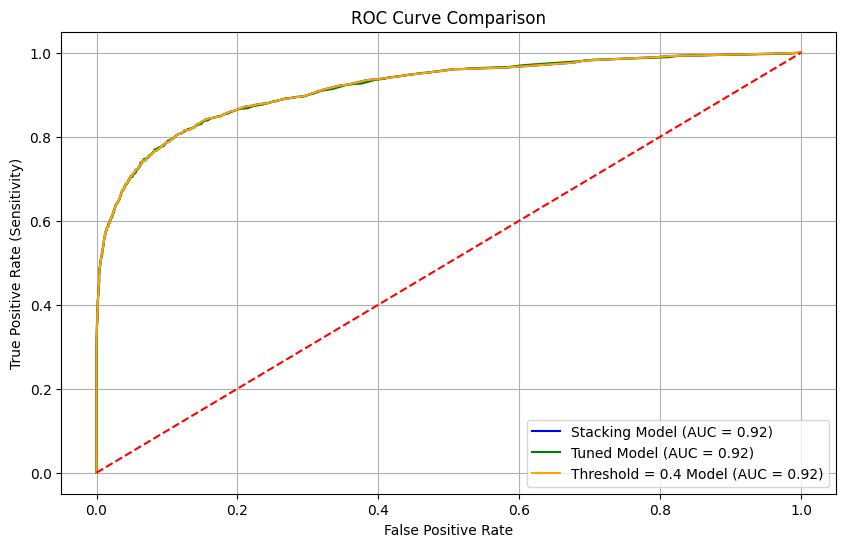

In [ ]:
#Combining all results in the ROC Curve to show the difference
y_pred_prob_stacking = stacking_clf.predict_proba(X_test_selected)[:, 1]
y_pred_prob_tuned = best_stacking_clf.predict_proba(X_test_selected)[:, 1]
y_pred_prob_threshold = y_pred_prob_stacking

#calculate ROC curves
fpr_stacking, tpr_stacking, _ = roc_curve(y_test_selected, y_pred_prob_stacking)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test_selected, y_pred_prob_tuned)
fpr_threshold, tpr_threshold, _ = roc_curve(y_test_selected, y_pred_prob_threshold)

#calculate AUC for all models
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)
roc_auc_threshold = auc(fpr_threshold, tpr_threshold)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_stacking, tpr_stacking, color='blue', label='Stacking Model (AUC = {:.2f})'.format(roc_auc_stacking))
plt.plot(fpr_tuned, tpr_tuned, color='green', label='Tuned Model (AUC = {:.2f})'.format(roc_auc_tuned))
plt.plot(fpr_threshold, tpr_threshold, color='orange', label='Threshold = 0.4 Model (AUC = {:.2f})'.format(roc_auc_threshold))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The ROC curve represents the trade-off between True Positive Rate and False Positive Rate for different classification thresholds.

# **13. Final Discussion**

>The objective is the predict loan default using machine learning techniques to mitigate financial risks. Accurate prediction help company to reduce losses and avoid extra costs related legal procedures.

>Accurate predictions of loan status can help reduce loan defaults, providing significant cost savings and improved cash flow for the company.

>Dataset covers demographic information such as age, employment length, loan details, credit history and the loan status which is our target column.

>I filled the missing values based on their skewness for person_emp_length and loan_int_rate features.

>There were also outlier values in the dataset in age, employment length. I removed ages over 80 and employment length over 60.

>The data significantly is imbalance in terms of "loan_status". 78% of the data clasified as status 0, which represent people who pay their loan. I hesitated to use oversampling or undersampling methods to create more bias. I choosed to apply weighting and ensemble method to handle imbalance in the data.

>loan_int_rate, loan_percent_income, and cb_person_default_on_file showed as significant predictors of loan status by checking line charts and distribution each of it.

>I encoded categorical features to catch a relationship between loan status.

>I implemented PCA to reduce the number of features while keeping important informations.

>For feaute selection part, I utilized SelectKBest to identify most predictive features for model.

>Also I check the feature importance by applying Random Forest Model.

>I created three different feature groups based on correlation, seleckbest and feature importance and train this features with 5 different models including Logistic Regression, SVM, Desicion Tree, KNN, Random Forest.

>As I mentioned before, I used weigted models to adress the class imbalance. Based on accuracy, F1 Score and confusion metrics I compare the resuts.

>After choosing best feature group I ensembled models to reach better solution which was Stacking Model (KNN+Random Forest)

>I focused on F score for business objective, by applying hyperparameter tuning I try to catch better success, I slightly make it better.

>The pipeline effectively merged preprocessing, feature engineering, and advanced modeling techniques to tackle issue of loan defaults.

>I prioritize the F1 Score and minimize the false negative to reduce financial risk, the solution is aligned with the goal of the company. I slightly improved the model by applying ensemble models, conducting hyperparameter tuning, and carefully considering trade-offs in performance metrics.

>While ensemble methods and weighting have been explored, the approach may still not fully address the underlying bias introduced by the loan_status=0 class in the dataset.


>Some models, particularly stacking classifiers, can be intensive and may take  longer training times, which can be a limitation in a real-time decision-making scenario.


>Overall, I developed pipeline which demonstrates a robust approach to predicting loan default along with actionable insights that can significantly improve company's operations.

In [ ]:
%%shell
jupyter nbconvert --to html /content/GH1030814_IntroAI_Final_Assesment.ipynb



[NbConvertApp] Converting notebook /content/GH1030814_IntroAI_Final_Assesment.ipynb to html
[NbConvertApp] Writing 3508494 bytes to /content/GH1030814_IntroAI_Final_Assesment.html
